<a href="https://www.kaggle.com/code/azminetoushikwasi/linear-regression-with-eda-stacking-ensembling?scriptVersionId=108901452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:10px;color:black;margin:0;font-size:150%;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:500"><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png"></div>


<div style="padding:10px;color:black;margin:0;font-size:450%;text-align:center;display:fill;border-radius:5px;background-color:#e1f5e6;overflow:hidden;font-weight:500"><b>Linear Regression with EDA, Stacking & Ensembling</b></div>


<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>🧾 Introduction</b></div>


# 🧾  Introduction

## Stacking
Stacking is one of the most popular ensemble machine learning techniques used to predict multiple nodes to build a new model and improve model performance. Stacking enables us to train multiple models to solve similar problems, and based on their combined output, it builds a new model with improved performance.
![](https://media.geeksforgeeks.org/wp-content/uploads/20190515104518/stacking.png)

## Ensemble
Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.
![](https://machinelearningmastery.com/wp-content/uploads/2020/11/Bagging-Ensemble.png)

****<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📄 Modules and Settings</b></div>


# 📄 1. Modules and Settings

## 1.1. Data Analysis Modules

In [1]:
import datetime
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

import time

## 1.2. Data Analysis

In [3]:
from scipy import stats
from scipy.stats import norm, skew, kurtosis, boxcox #for some statistics
from scipy.special import boxcox1p, inv_boxcox, inv_boxcox1p
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder, RobustScaler, StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from subprocess import check_output
StartTime = datetime.datetime.now()

## 1.3. Modeling Modules and Libraries

In [4]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb
import lightgbm as lgb
from catboost import Pool, CatBoostRegressor

## 1.4. Deep Learning Modeling Modules and Libraries

In [5]:
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Embedding
#from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.callbacks import LearningRateScheduler, EarlyStopping, History, LambdaCallback
from keras import regularizers
from keras import backend as K
from keras.layers import Conv1D
from keras.layers import BatchNormalization
from keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam   #for adam optimizer

## 1.5. Helper Functions

In [6]:
class MyTimer():
    # usage:
    #with MyTimer():                            
    #    rf.fit(X_train, y_train)
    
    def __init__(self):
        self.start = time.time()
    def __enter__(self):
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        end = time.time()
        runtime = end - self.start
        msg = 'The function took {time} seconds to complete'
        print(msg.format(time=runtime))

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📜 Data Loading</b></div>


# 📜 2. Data Loading

In [7]:
competition = 'SR' # StackedRegression

try:
    a = check_output(["ls", "../input"]).decode("utf8") # new Kaggle competition
except:
    a=''
finally:
    print('')
try:
    b = check_output(["ls", "-rlt", "../StackedRegression"]).decode("utf8")
except:
    b=''
finally:
    print('')    

ls: cannot access '../StackedRegression': No such file or directory


In [8]:
if (len(a) > 0): # new competition
    competition = 'SR'
    train = pd.read_csv('../input/home-data-for-ml-course/train.csv')#,index_col='Id')
    test = pd.read_csv('../input/home-data-for-ml-course/test.csv')#,index_col='Id')
elif (len(b)): # run locally
    competition = 'SR'
    train = pd.read_csv('input/train.csv')
    test = pd.read_csv('input/test.csv')
else: # old competition
    competition = 'SRP_2'
    train = pd.read_csv('../input/train.csv')
    test = pd.read_csv('../input/test.csv')

In [9]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📉 Data Pre-processing</b></div>


# 📉 3. Data Pre-processing

## 3.1. Checking Outliers

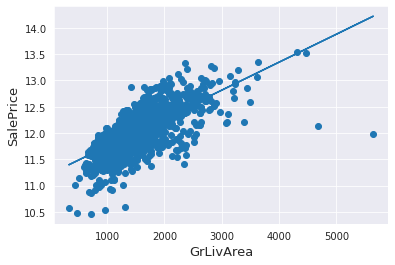

In [11]:
fig, ax = plt.subplots()
#ax.scatter(x = train['GrLivArea'], y = train['SalePrice']
ax.scatter(x = train['GrLivArea'], y = np.log(train['SalePrice']))
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

#m, b = np.polyfit(train['GrLivArea'], train['SalePrice'], 1)
m, b = np.polyfit(train['GrLivArea'], np.log(train['SalePrice']), 1)
#m = slope, b=intercept
plt.plot(train['GrLivArea'], m*train['GrLivArea'] + b)

plt.show()

## 3.2. Checking column values

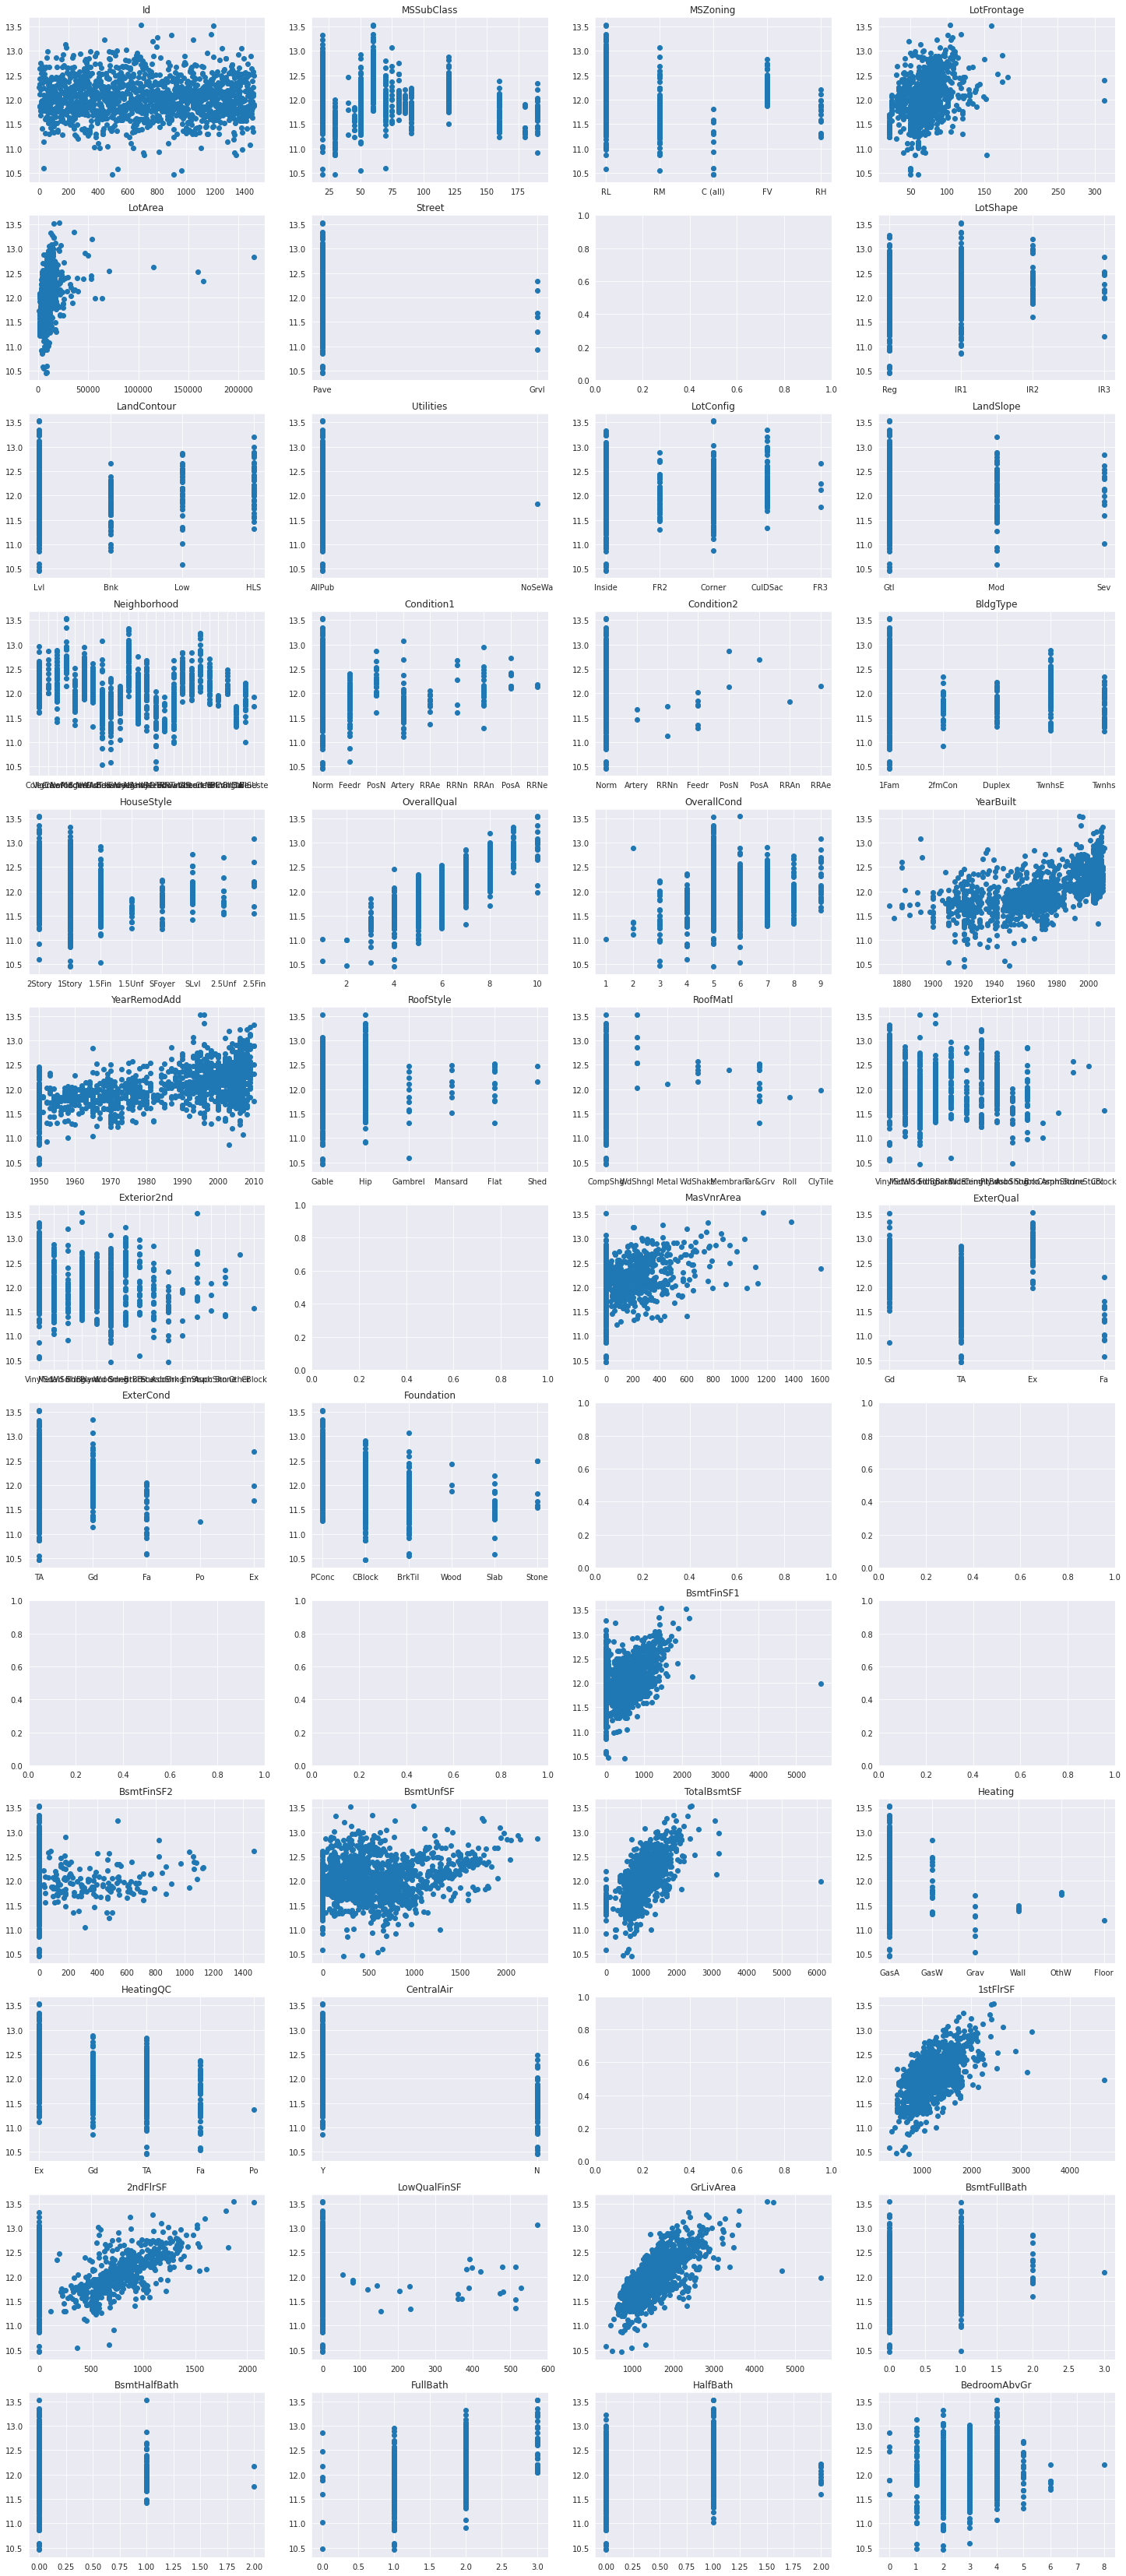

In [12]:
train.shape[1]
a = 6
b = int(train.shape[1]/4)
r = int(train.shape[1]/a)
c = int(train.shape[1]/b)
i = 0
fig, ax = plt.subplots(nrows=r, ncols=c, figsize=(25, 60))
for row in ax:
    for col in row:
        try:
            col.scatter(x = train[train.columns[i]], y = np.log(train['SalePrice']))
            col.title.set_text(train.columns[i])
        except:
            temp=1
        #except Exception as e:
        #    print(e.message, e.args)
        finally:
            temp=1
        i = i + 1
        
plt.show()

## 3.3. Flitering Data

In [13]:
train = train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<220000)].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

## 3.4. Droping Id columns

In [14]:
train_ID = train['Id']
test_ID = test['Id']


train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>✂️ Data Wrangling</b></div>


# ✂️ 4. Data Wrangling

## 4.1. GrLivArea - column

### 4.1.2. GrLivArea - column : Trying linear regression

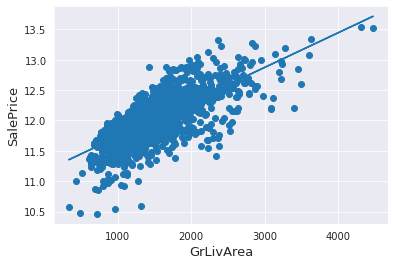

In [15]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], np.log(train['SalePrice']))
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
m, b = np.polyfit(train['GrLivArea'], np.log(train['SalePrice']), 1)
plt.plot(train['GrLivArea'], m*train['GrLivArea'] + b)
plt.show()

### 4.1.2. GrLivArea - column : Trying polynomial regression

[5.70762509e-04 1.11618915e+01]


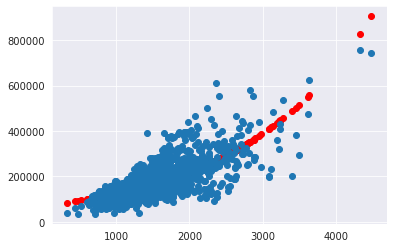

In [16]:
x_data = train['GrLivArea']
y_data = train['SalePrice']
log_y_data = np.log(train['SalePrice'])

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
y = np.exp(1.11618915e+01) * np.exp(5.70762509e-04*x_data)
plt.plot(x_data, y_data, "o")
plt.scatter(x_data, y,c='red')

### 4.1.2. GrLivArea - column : Trying log transformation

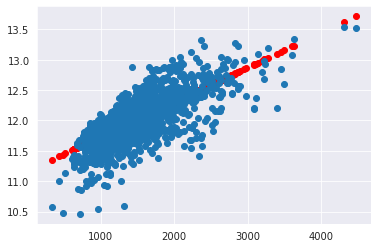

In [17]:
y = np.exp(1.11618915e+01) * np.exp(5.70762509e-04*x_data)
plt.plot(x_data, np.log(y_data), "o")
plt.scatter(x_data, np.log(y),c='red')

## 4.2. SalesPrice - Target Analysis

### 4.2.1. Checking Distribution


 mu = 180932.92 and sigma = 79467.79, skew = 1.88 kurtosis = 6.50



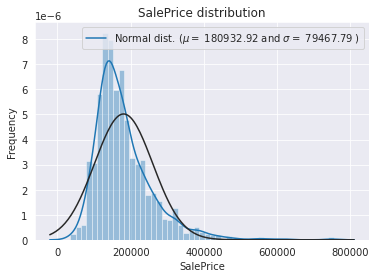

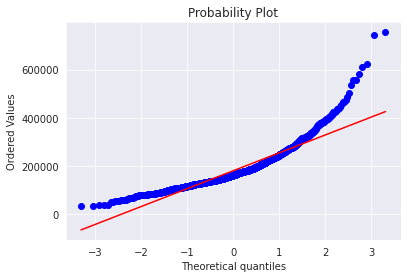

In [18]:
sns.distplot(train['SalePrice'] , fit=norm)

_skew = skew(train['SalePrice'])
_kurtosis = kurtosis(train['SalePrice'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}, skew = {:.2f} kurtosis = {:.2f}\n'.format(mu, sigma, _skew, _kurtosis))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


### 4.2.2. Transformation

In [19]:
lam_l = 0.35 
train["SalePrice"] = boxcox1p(train["SalePrice"], lam_l) 

### 4.2.3. Visualizing changes

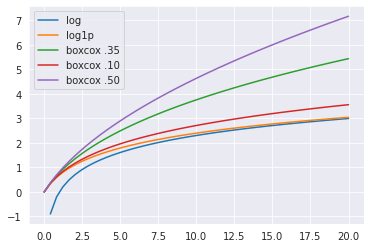

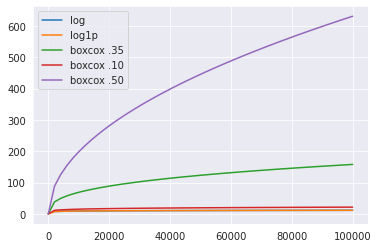

In [20]:
x = np.linspace(0, 20)
y1 = np.log(x)
y2 = np.log1p(x)
y3 = boxcox1p(x, 0.35)
y4 = boxcox1p(x, 0.10)
y5 = boxcox1p(x, 0.50)
plt.plot(x,y1,label='log') 
plt.plot(x,y2,label='log1p') 
plt.plot(x,y3,label='boxcox .35') 
plt.plot(x,y4,label='boxcox .10') 
plt.plot(x,y5,label='boxcox .50') 
plt.legend()
plt.show()

x = np.linspace(0, 100000)
y1 = np.log(x)
y2 = np.log1p(x)
y3 = boxcox1p(x, 0.35)
y4 = boxcox1p(x, 0.10)
y5 = boxcox1p(x, 0.50)
plt.plot(x,y1,label='log') 
plt.plot(x,y2,label='log1p') 
plt.plot(x,y3,label='boxcox .35') 
plt.plot(x,y4,label='boxcox .10') 
plt.plot(x,y5,label='boxcox .50') 
plt.legend()
plt.show()

### 4.2.4. Check new distributions


 mu = 191.18 and sigma = 27.62, skew = 0.69 kurtosis = 1.31



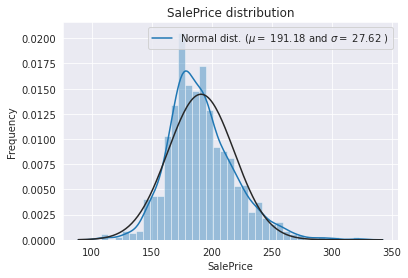

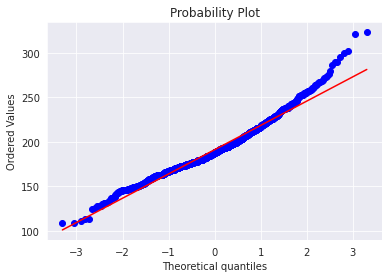

In [21]:
sns.distplot(train['SalePrice'] , fit=norm);

_skew = skew(train['SalePrice'])
_kurtosis = kurtosis(train['SalePrice'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}, skew = {:.2f} kurtosis = {:.2f}\n'.format(mu, sigma, _skew, _kurtosis))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>🛠 Feature Engineeering</b></div>


# 🛠 5. Feature Engineeering

In [22]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [23]:
def add_gla2(row, p):
    return (row.GrLivArea**p)

## 5.1. Check Result distribution

In [24]:
correlation_matrix = np.corrcoef(all_data.GrLivArea[:ntrain], y_train)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.5445354638265293


## 5.2. All Data

In [25]:
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL       65.000     8450   Pave   NaN      Reg   
1          20       RL       80.000     9600   Pave   NaN      Reg   
2          60       RL       68.000    11250   Pave   NaN      IR1   
3          70       RL       60.000     9550   Pave   NaN      IR1   
4          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

## 5.3. Missing Data

In [26]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(30)

Missing Ratio
PoolQC               99.691
MiscFeature          96.400
Alley                93.212
Fence                80.425
FireplaceQu          48.680
LotFrontage          16.661
GarageFinish          5.451
GarageQual            5.451
GarageCond            5.451
GarageYrBlt           5.451
GarageType            5.382
BsmtExposure          2.811
BsmtCond              2.811
BsmtQual              2.777
BsmtFinType2          2.743
BsmtFinType1          2.708
MasVnrType            0.823
MasVnrArea            0.788
MSZoning              0.137
BsmtFullBath          0.069
BsmtHalfBath          0.069
Functional            0.069
Utilities             0.069
GarageArea            0.034
GarageCars            0.034
Electrical            0.034
KitchenQual           0.034
TotalBsmtSF           0.034
BsmtUnfSF             0.034
BsmtFinSF2            0.034

## 5.4. Missing Data - analysis

Text(0.5, 1.0, 'Percent missing data by feature')

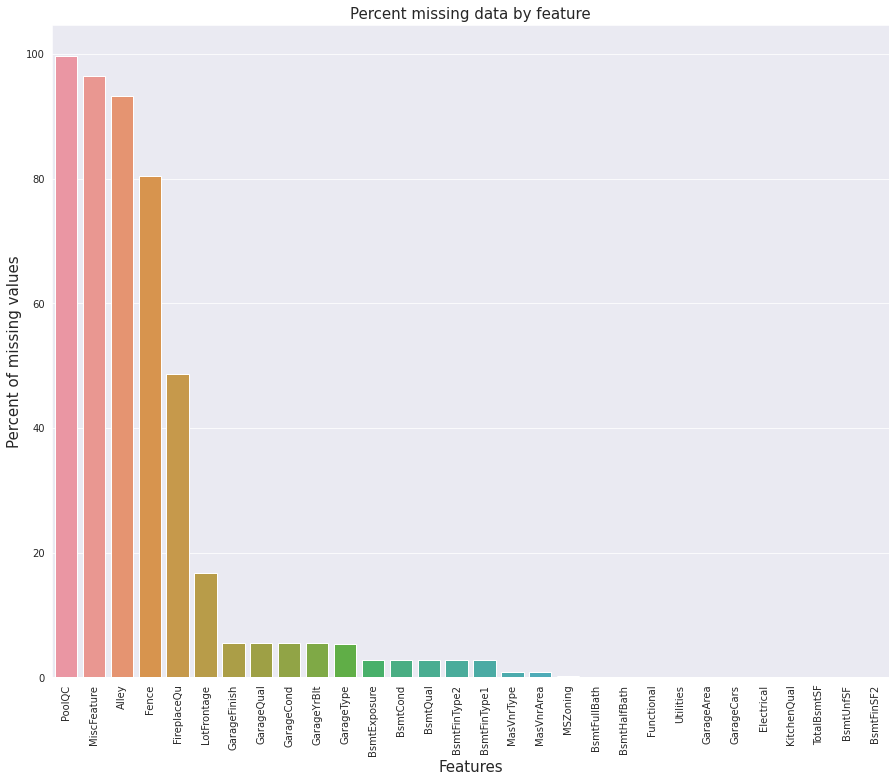

In [27]:
all_numerical = all_data.select_dtypes(include=np.number).columns.tolist()
missing_data.index.values.tolist()
missing_df = all_data[missing_data.index.values.tolist()]
missing_numerical = missing_df.select_dtypes(include=np.number).columns.tolist()
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## 5.5. Data Correlation

<AxesSubplot:>

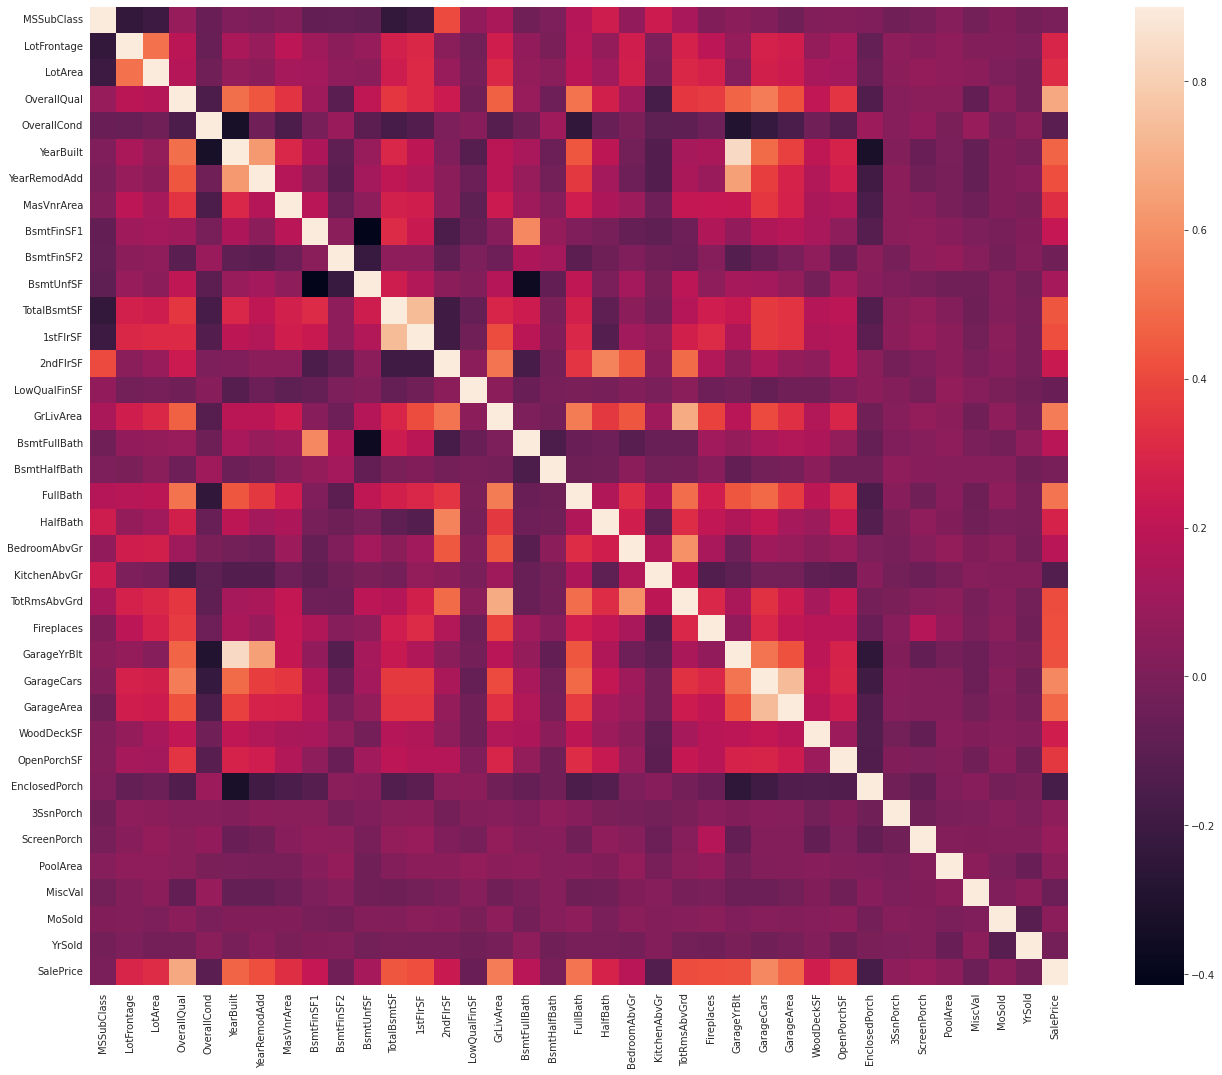

In [28]:
#Correlation map to see how features are correlated with each other and with SalePrice
corrmat = train.corr(method='kendall')
plt.subplots(figsize=(24,18))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [29]:
print (corrmat['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corrmat['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice     1.000
OverallQual   0.671
GarageCars    0.573
GrLivArea     0.545
FullBath      0.519
Name: SalePrice, dtype: float64 

MiscVal         -0.051
LowQualFinSF    -0.055
OverallCond     -0.103
KitchenAbvGr    -0.135
EnclosedPorch   -0.172
Name: SalePrice, dtype: float64


## 5.6 Imputing missing values 

In statistics, imputation is the process of replacing missing data with substituted values. When substituting for a data point, it is known as "unit imputation"; when substituting for a component of a data point, it is known as "item imputation". Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extend, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.

Details : https://www.kaggle.com/code/azminetoushikwasi/all-imputation-techniques-with-pros-and-cons

We impute them  by proceeding sequentially  through features with missing values 

- **PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 
- **MiscFeature** : data description says NA means "no misc feature"
- **Alley** : data description says NA means "no alley access"
- **Fence** : data description says NA means "no fence"
- **FireplaceQu** : data description says NA means "no fireplace"
- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None
- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.

In [30]:
ImputeToNone = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in ImputeToNone:  
    all_data[col].fillna("None", inplace=True)

In [31]:
all_data[missing_numerical]

LotFrontage  GarageYrBlt  MasVnrArea  BsmtFullBath  BsmtHalfBath  \
0          65.000     2003.000     196.000         1.000         0.000   
1          80.000     1976.000       0.000         0.000         1.000   
2          68.000     2001.000     162.000         1.000         0.000   
3          60.000     1998.000       0.000         1.000         0.000   
4          84.000     2000.000     350.000         1.000         0.000   
...           ...          ...         ...           ...           ...   
2912       21.000          NaN       0.000         0.000         0.000   
2913       21.000     1970.000       0.000         0.000         0.000   
2914      160.000     1960.000       0.000         1.000         0.000   
2915       62.000          NaN       0.000         0.000         1.000   
2916       74.000     1993.000      94.000         0.000         0.000   

      GarageArea  GarageCars  TotalBsmtSF  BsmtUnfSF  BsmtFinSF2  
0        548.000       2.000      856.000    150.000       0.000  
1        460.000       2.000     1262.000    284.000       0.000  
2        608.000       2.000      920.000    434.000       0.000  
3        642.000       3.000      756.000    540.000       0.000  
4        836.000       3.000     1145.000    490.000       0.000  
...          ...         ...          ...        ...         ...  
2912       0.000       0.000      546.000    546.000       0.000  
2913     286.000       1.000      546.000    294.000       0.000  
2914     576.000       2.000     1224.000      0.000       0.000  
2915       0.000       0.000      912.000    575.000       0.000  
2916     650.000       3.000      996.000    238.000       0.000  

[2917 rows x 10 columns]

In [32]:
corrmat2 = all_data[missing_numerical].corr(method='kendall')
corrmat2

LotFrontage  GarageYrBlt  MasVnrArea  BsmtFullBath  \
LotFrontage         1.000        0.090       0.210         0.088   
GarageYrBlt         0.090        1.000       0.235         0.105   
MasVnrArea          0.210        0.235       1.000         0.144   
BsmtFullBath        0.088        0.105       0.144         1.000   
BsmtHalfBath       -0.025       -0.067       0.030        -0.153   
GarageArea          0.263        0.432       0.281         0.159   
GarageCars          0.277        0.525       0.346         0.151   
TotalBsmtSF         0.269        0.250       0.294         0.261   
BsmtUnfSF           0.061        0.117       0.040        -0.344   
BsmtFinSF2          0.039       -0.113      -0.025         0.158   

              BsmtHalfBath  GarageArea  GarageCars  TotalBsmtSF  BsmtUnfSF  \
LotFrontage         -0.025       0.263       0.277        0.269      0.061   
GarageYrBlt         -0.067       0.432       0.525        0.250      0.117   
MasVnrArea           0.030       0.281       0.346        0.294      0.040   
BsmtFullBath        -0.153       0.159       0.151        0.261     -0.344   
BsmtHalfBath         1.000      -0.021      -0.038        0.003     -0.086   
GarageArea          -0.021       1.000       0.747        0.334      0.071   
GarageCars          -0.038       0.747       1.000        0.355      0.108   
TotalBsmtSF          0.003       0.334       0.355        1.000      0.252   
BsmtUnfSF           -0.086       0.071       0.108        0.252      1.000   
BsmtFinSF2           0.130      -0.010      -0.055        0.051     -0.238   

              BsmtFinSF2  
LotFrontage        0.039  
GarageYrBlt       -0.113  
MasVnrArea        -0.025  
BsmtFullBath       0.158  
BsmtHalfBath       0.130  
GarageArea        -0.010  
GarageCars        -0.055  
TotalBsmtSF        0.051  
BsmtUnfSF         -0.238  
BsmtFinSF2         1.000

In [33]:
def ImputeData(all_data, numerical_input, col_to_impute):
    from sklearn.impute import KNNImputer
    
    Missing = all_data[numerical_input]
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(Missing)
    Xtrans = imputer.transform(Missing)
    df_miss = pd.DataFrame(Xtrans,columns = Missing.columns)
    all_data[col_to_impute] = df_miss[col_to_impute]
    return (all_data)

In [34]:
all_data = ImputeData(all_data, all_numerical, 'LotFrontage')
all_data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL       65.000     8450   Pave  None      Reg   
1             20       RL       80.000     9600   Pave  None      Reg   
2             60       RL       68.000    11250   Pave  None      IR1   
3             70       RL       60.000     9550   Pave  None      IR1   
4             60       RL       84.000    14260   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2912         160       RM       21.000     1936   Pave  None      Reg   
2913         160       RM       21.000     1894   Pave  None      Reg   
2914          20       RL      160.000    20000   Pave  None      Reg   
2915          85       RL       62.000    10441   Pave  None      Reg   
2916          60       RL       74.000     9627   Pave  None      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...           0        0   None   None   
1            Lvl    AllPub       FR2  ...           0        0   None   None   
2            Lvl    AllPub    Inside  ...           0        0   None   None   
3            Lvl    AllPub    Corner  ...           0        0   None   None   
4            Lvl    AllPub       FR2  ...           0        0   None   None   
...          ...       ...       ...  ...         ...      ...    ...    ...   
2912         Lvl    AllPub    Inside  ...           0        0   None   None   
2913         Lvl    AllPub    Inside  ...           0        0   None   None   
2914         Lvl    AllPub    Inside  ...           0        0   None   None   
2915         Lvl    AllPub    Inside  ...           0        0   None  MnPrv   
2916         Lvl    AllPub    Inside  ...           0        0   None   None   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0           None       0       2    2008        WD         Normal  
1           None       0       5    2007        WD         Normal  
2           None       0       9    2008        WD         Normal  
3           None       0       2    2006        WD        Abnorml  
4           None       0      12    2008        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
2912        None       0       6    2006        WD         Normal  
2913        None       0       4    2006        WD        Abnorml  
2914        None       0       9    2006        WD        Abnorml  
2915        Shed     700       7    2006        WD         Normal  
2916        None       0      11    2006        WD         Normal  

[2917 rows x 79 columns]

- **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)
- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement
- **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 
- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'
- **MSSubClass** : Na most likely means No building class. We can replace missing values with None
- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.
- **SaleType** : Fill in again with most frequent which is "WD"

In [35]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [36]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Missing Ratio  0 non-null      float64
dtypes: float64(1)
memory usage: 0.0+ bytes


## 5.7. Transforming some numerical variables that are really categorical

In [37]:
import datetime
Yr = all_data['YrSold'].min()
Mo = all_data['MoSold'].min()
t = datetime.datetime(Yr, Mo, 1, 0, 0)

def calculateYrMo (row):   
    return int((datetime.datetime(row.YrSold,row.MoSold,1) - t).total_seconds())

all_data['YrMoSold'] = all_data.apply(lambda row: calculateYrMo(row), axis=1)

In [38]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## 5.8 Label Encoding

In [39]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'YrMoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

## 5.9 Ading new features

In [40]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd'] # A-
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'])

## 5.10 Skewwness Determination and Reduction

In [41]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index

lam_f = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam_f)


Skew in numerical features: 

There are 62 skewed numerical features to Box Cox transform


## 5.10 Dummy Variables for Categorical Features

In [42]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 223)


## 5.11 PCA and Droping lowest co-relation columns

In [43]:
correlations = corrmat['SalePrice'].sort_values(ascending=False)
df_corr = correlations.to_frame()
print(df_corr.query("abs(SalePrice) < 0.011"))
low_corr = df_corr.query("abs(SalePrice) < 0.011").index.values.tolist()

              SalePrice
MSSubClass       -0.004
BsmtHalfBath     -0.010


Text(0, 0.5, 'cumulative explained variance')

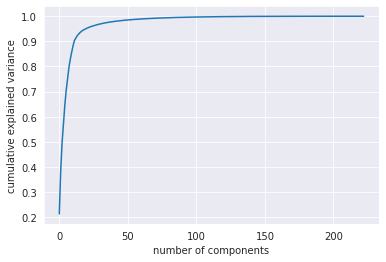

In [44]:
pca = PCA().fit(all_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [45]:
weights = np.round(pca.components_, 3) 
ev = np.round(pca.explained_variance_ratio_, 3)
print('explained variance ratio',ev)
pca_wt = pd.DataFrame(weights)#, columns=all_data.columns)
pca_wt.head()

explained variance ratio [0.213 0.167 0.114 0.076 0.073 0.061 0.048 0.044 0.033 0.028 0.025 0.022
 0.01  0.009 0.007 0.006 0.005 0.004 0.003 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.  

0      1      2      3      4      5      6      7      8      9    ...  \
0  0.046 -0.015 -0.047 -0.000 -0.004  0.016 -0.003 -0.004  0.000 -0.002  ...   
1 -0.026 -0.017 -0.062 -0.000 -0.002  0.028 -0.001 -0.028  0.001 -0.003  ...   
2 -0.035  0.024  0.058  0.000  0.002 -0.016 -0.003  0.021 -0.008  0.003  ...   
3  0.008  0.004  0.044 -0.000 -0.001 -0.013  0.003 -0.003  0.006  0.000  ...   
4 -0.004 -0.011 -0.038 -0.000 -0.001 -0.004 -0.000  0.000 -0.007  0.001  ...   

     213    214    215    216    217    218    219    220    221    222  
0  0.000  0.000 -0.000 -0.000  0.001  0.001 -0.000  0.000 -0.001  0.000  
1  0.000 -0.005  0.001  0.001  0.004  0.001  0.001  0.000 -0.001 -0.005  
2 -0.001  0.017 -0.000 -0.016 -0.003 -0.001 -0.001  0.000 -0.012  0.017  
3  0.000 -0.002 -0.000  0.004 -0.003 -0.001  0.000  0.001  0.006 -0.003  
4 -0.000  0.002  0.001  0.001  0.003  0.001  0.000 -0.001 -0.005  0.001  

[5 rows x 223 columns]

<AxesSubplot:title={'center':"Kendall's Correlation Matrix Initial Train Set"}>

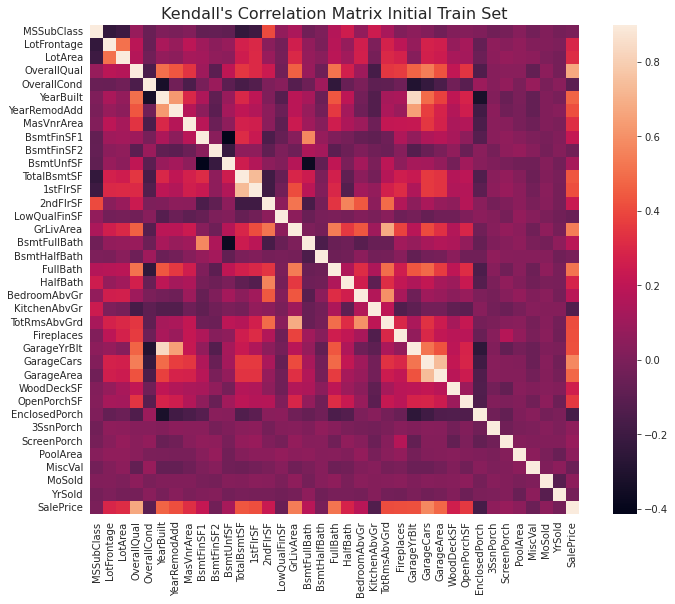

In [46]:
corrmat = train.corr(method='kendall')
plt.subplots(figsize=(12,9))
plt.title("Kendall's Correlation Matrix Initial Train Set", fontsize=16)
sns.heatmap(corrmat, vmax=0.9, square=True)

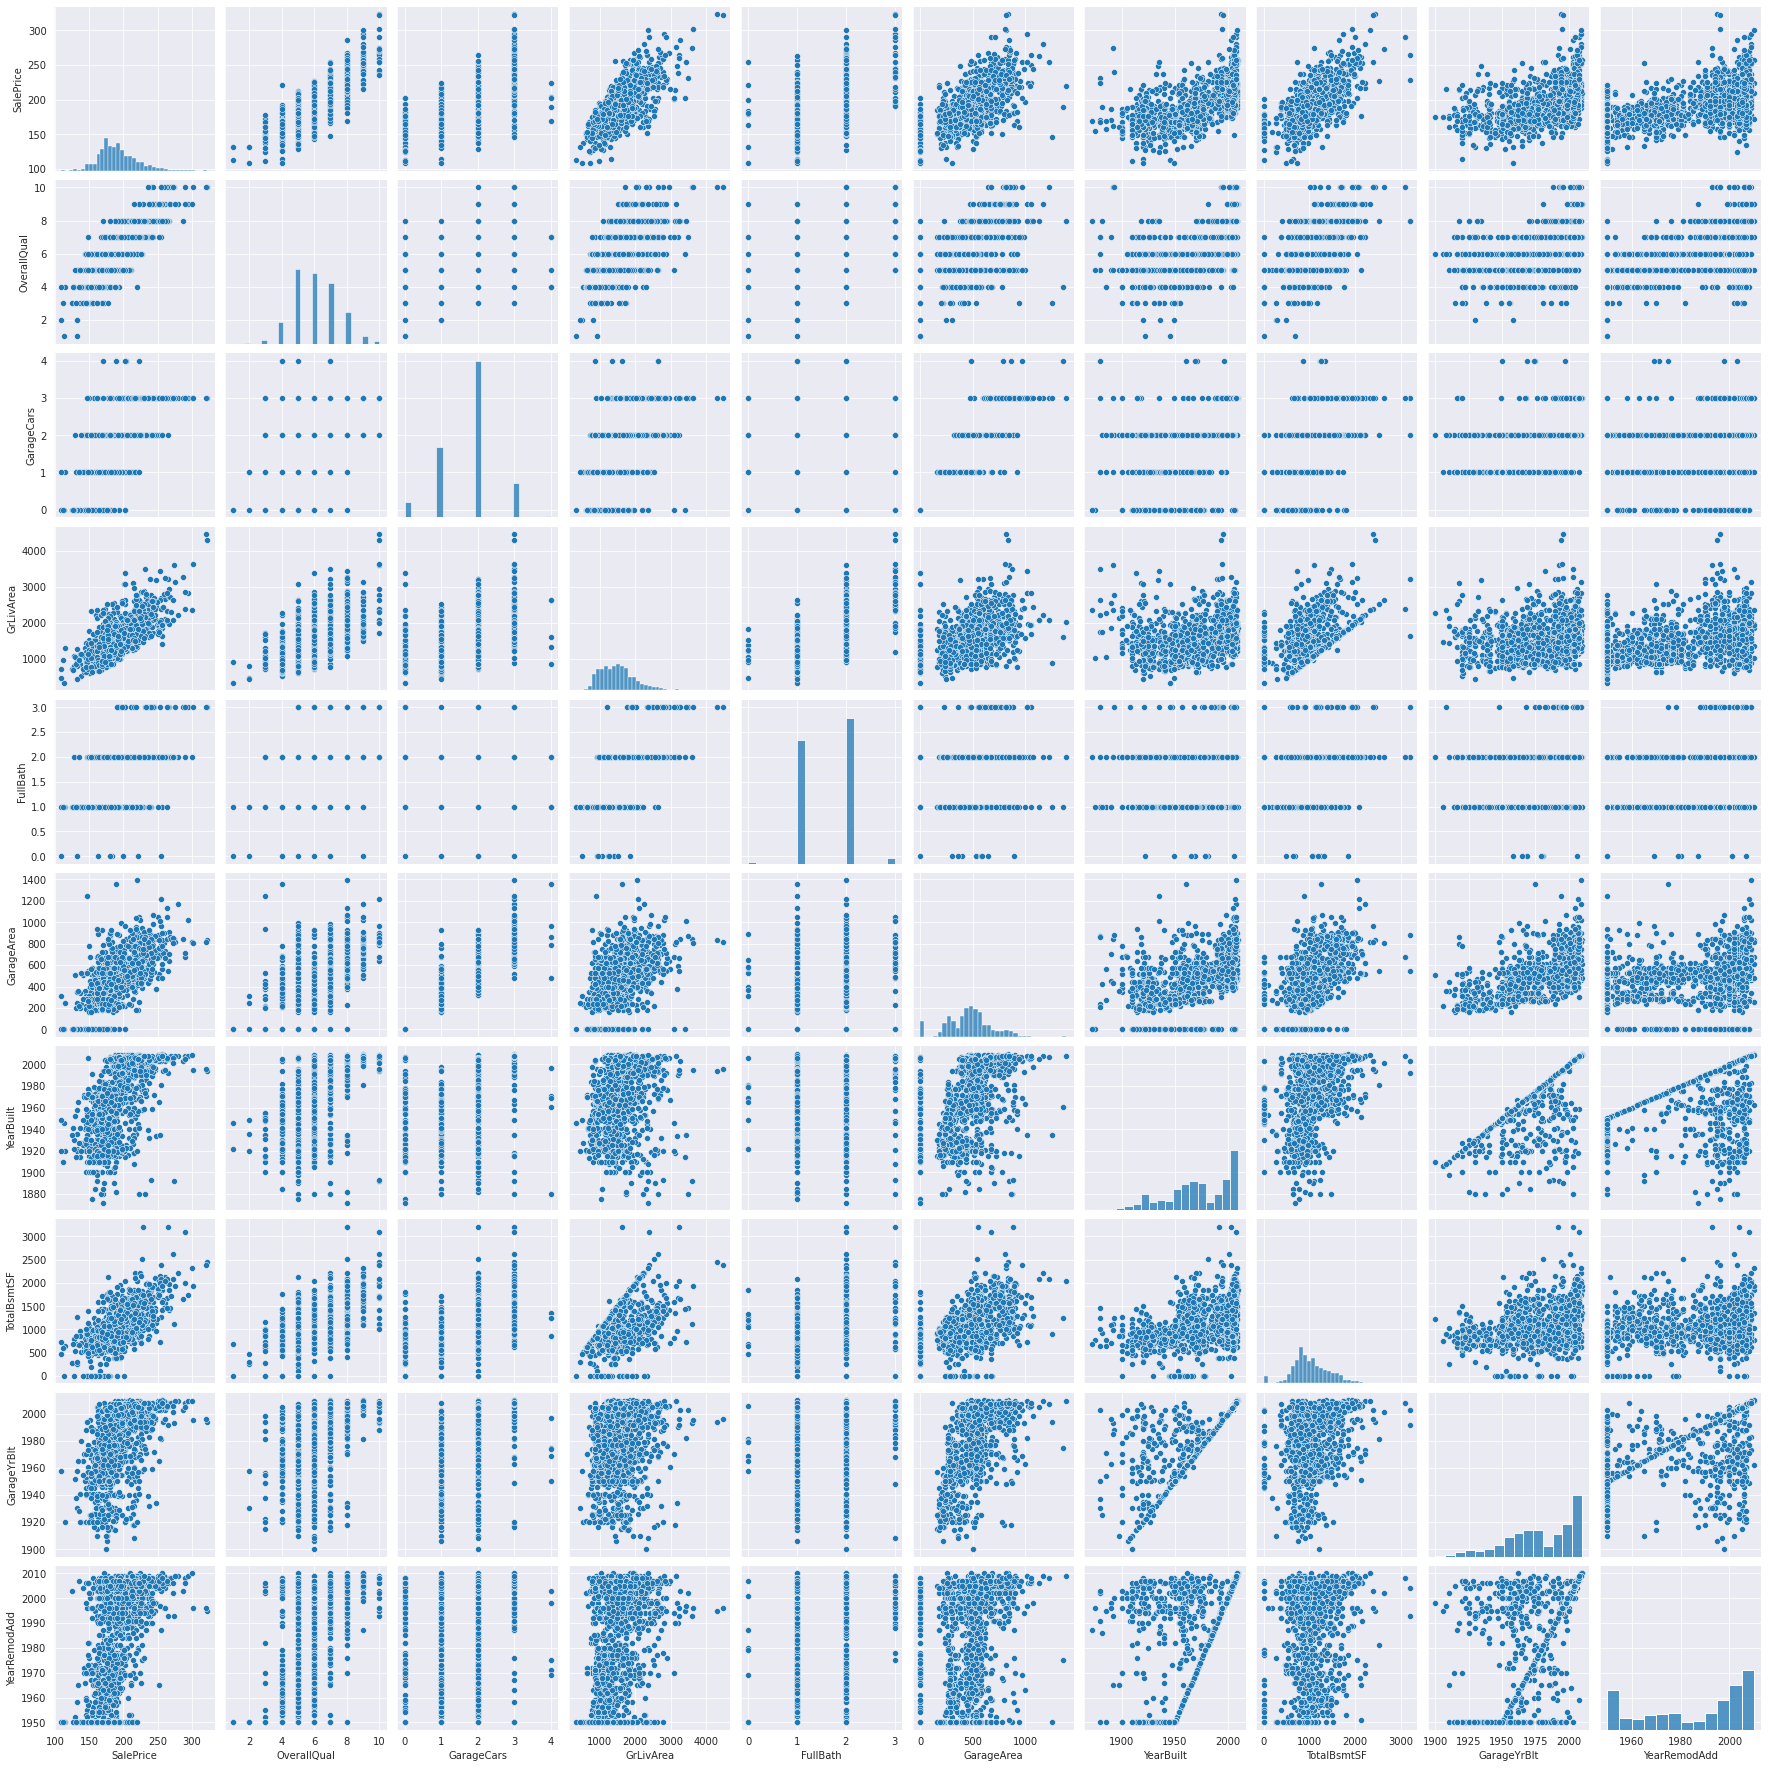

In [47]:
train_orig = train.copy()
train_orig['SalePrice'] = y_train
corrmat = train_orig.corr(method='kendall')

correlations = corrmat["SalePrice"].sort_values(ascending=False)
features = correlations.index[0:10]
sns.pairplot(train[features], height = 2.5)
plt.show();

In [48]:
sc = StandardScaler()
rc = RobustScaler()

use_pca = 0 # using PCA currently hurts the score
use_normalization = 0 # using StandardScaler doesn't work, try RobustScaler now

if (use_pca == 1):
    all_data_pca = pd.DataFrame(all_data_pca)
    train = all_data_pca[:ntrain]
    test = all_data_pca[ntrain:]
    all_data_pca.head()
elif (use_normalization == 1):
    train = all_data[:ntrain]
    test = all_data[ntrain:]
    scaled_features = sc.fit_transform(train)
    train = pd.DataFrame(scaled_features, index=train.index, columns=train.columns)
    scaled_features = sc.transform(test)
    test = pd.DataFrame(scaled_features, index=test.index, columns=test.columns)   
elif (use_normalization == 2):
    train = all_data[:ntrain]
    test = all_data[ntrain:]
    scaled_features = rc.fit_transform(train)
    train = pd.DataFrame(scaled_features, index=train.index, columns=train.columns)
    scaled_features = rc.transform(test)
    test = pd.DataFrame(scaled_features, index=test.index, columns=test.columns)  
else:
    # back to original splits (from train.csv and test.csv)
    train = all_data[:ntrain]
    test = all_data[ntrain:]

In [49]:
save_data = 0
if (save_data == 1):
    df1 = train.copy()
    df1['SalePrice'] = inv_boxcox1p(y_train, lam_l)
    df1.insert(0, 'Id', list(train_ID), allow_duplicates=False)
    df1.to_csv('HousePricesTrain.csv', index=False)  
    df2 = test.copy()
    df2.insert(0, 'Id', list(test_ID), allow_duplicates=False)
    df2.to_csv('HousePricesTest.csv', index=False) 

## 5.12 Co-relation with prediction variable

<AxesSubplot:>

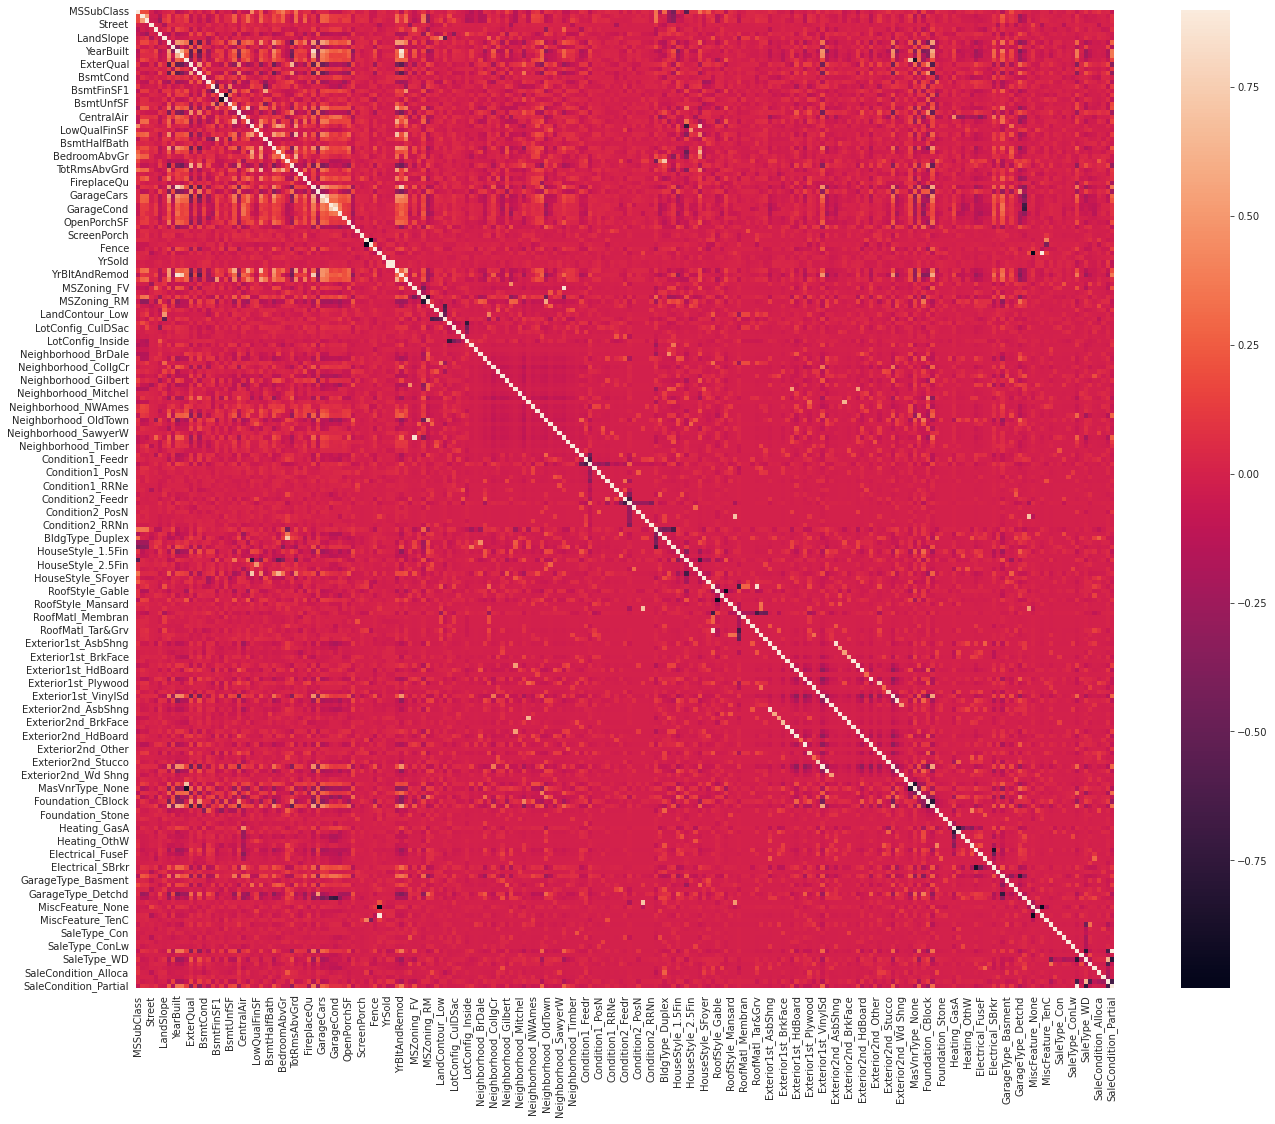

In [50]:
corrmat = train.corr(method='kendall')
plt.subplots(figsize=(24,18))
sns.heatmap(corrmat, vmax=0.9, square=True)

## 5.13 Co-relation with prediction variable (each-other)

<AxesSubplot:>

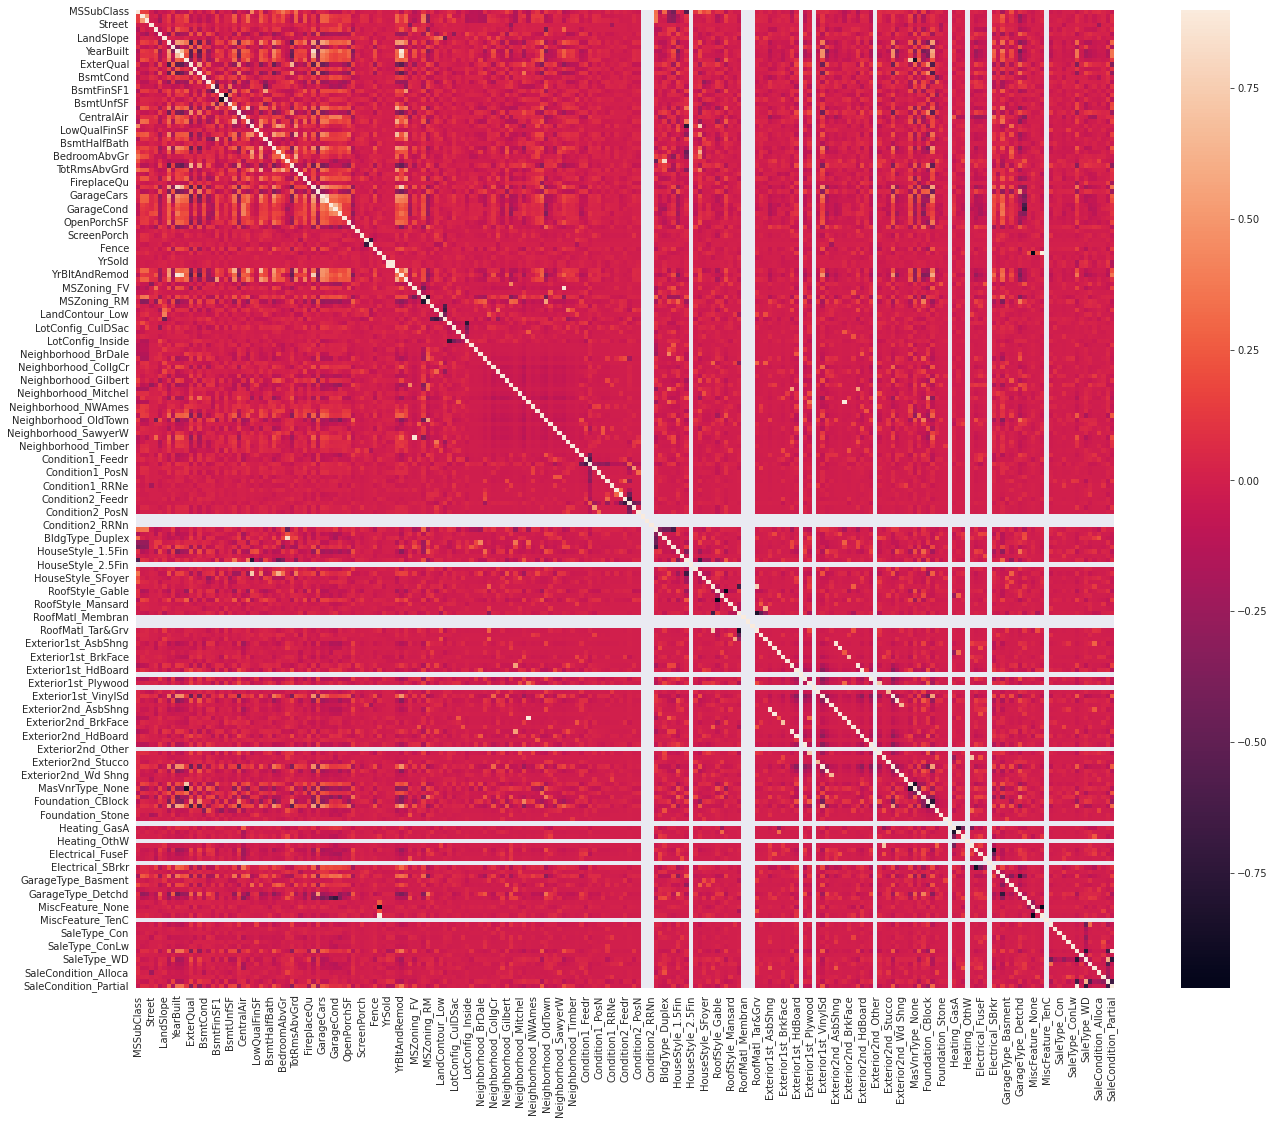

In [51]:
corrmat = test.corr(method='kendall')
plt.subplots(figsize=(24,18))
sns.heatmap(corrmat, vmax=0.9, square=True)

## 5.14 Observing Values

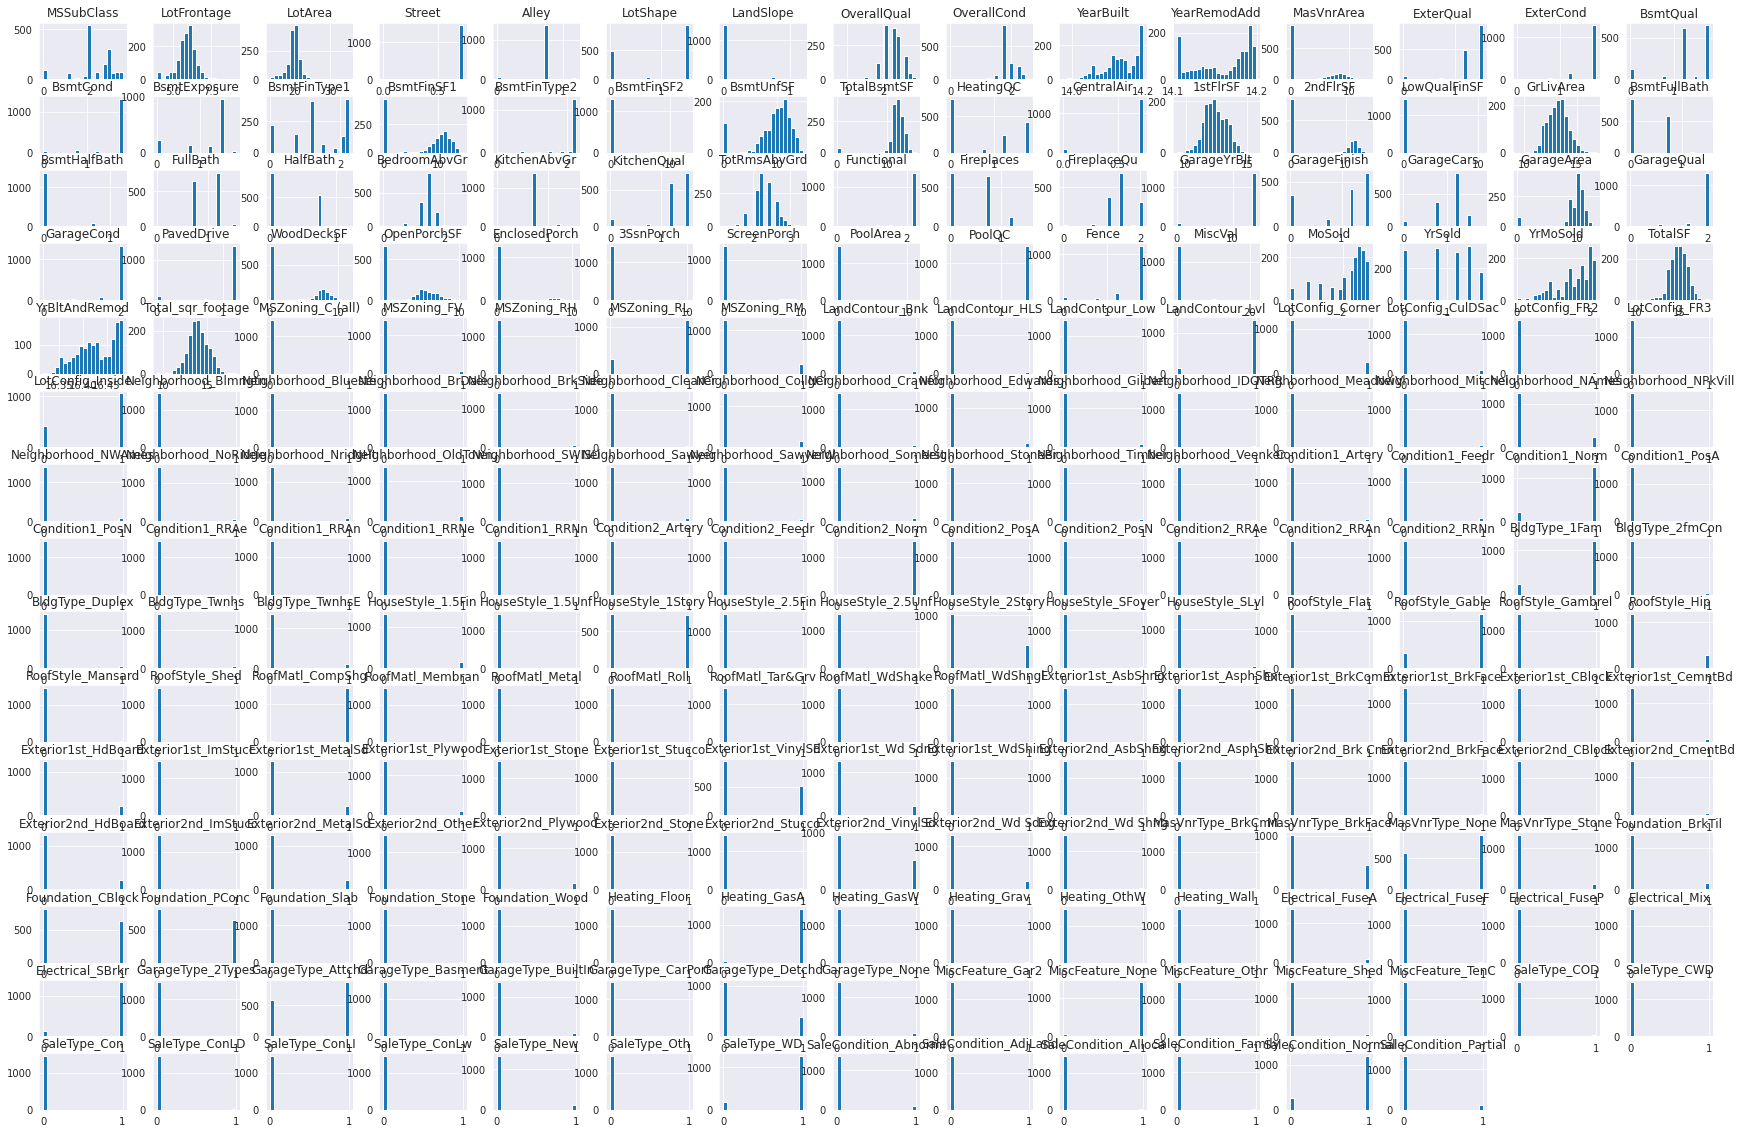

In [52]:
train.hist(bins=20, figsize=(30,20))
plt.show()

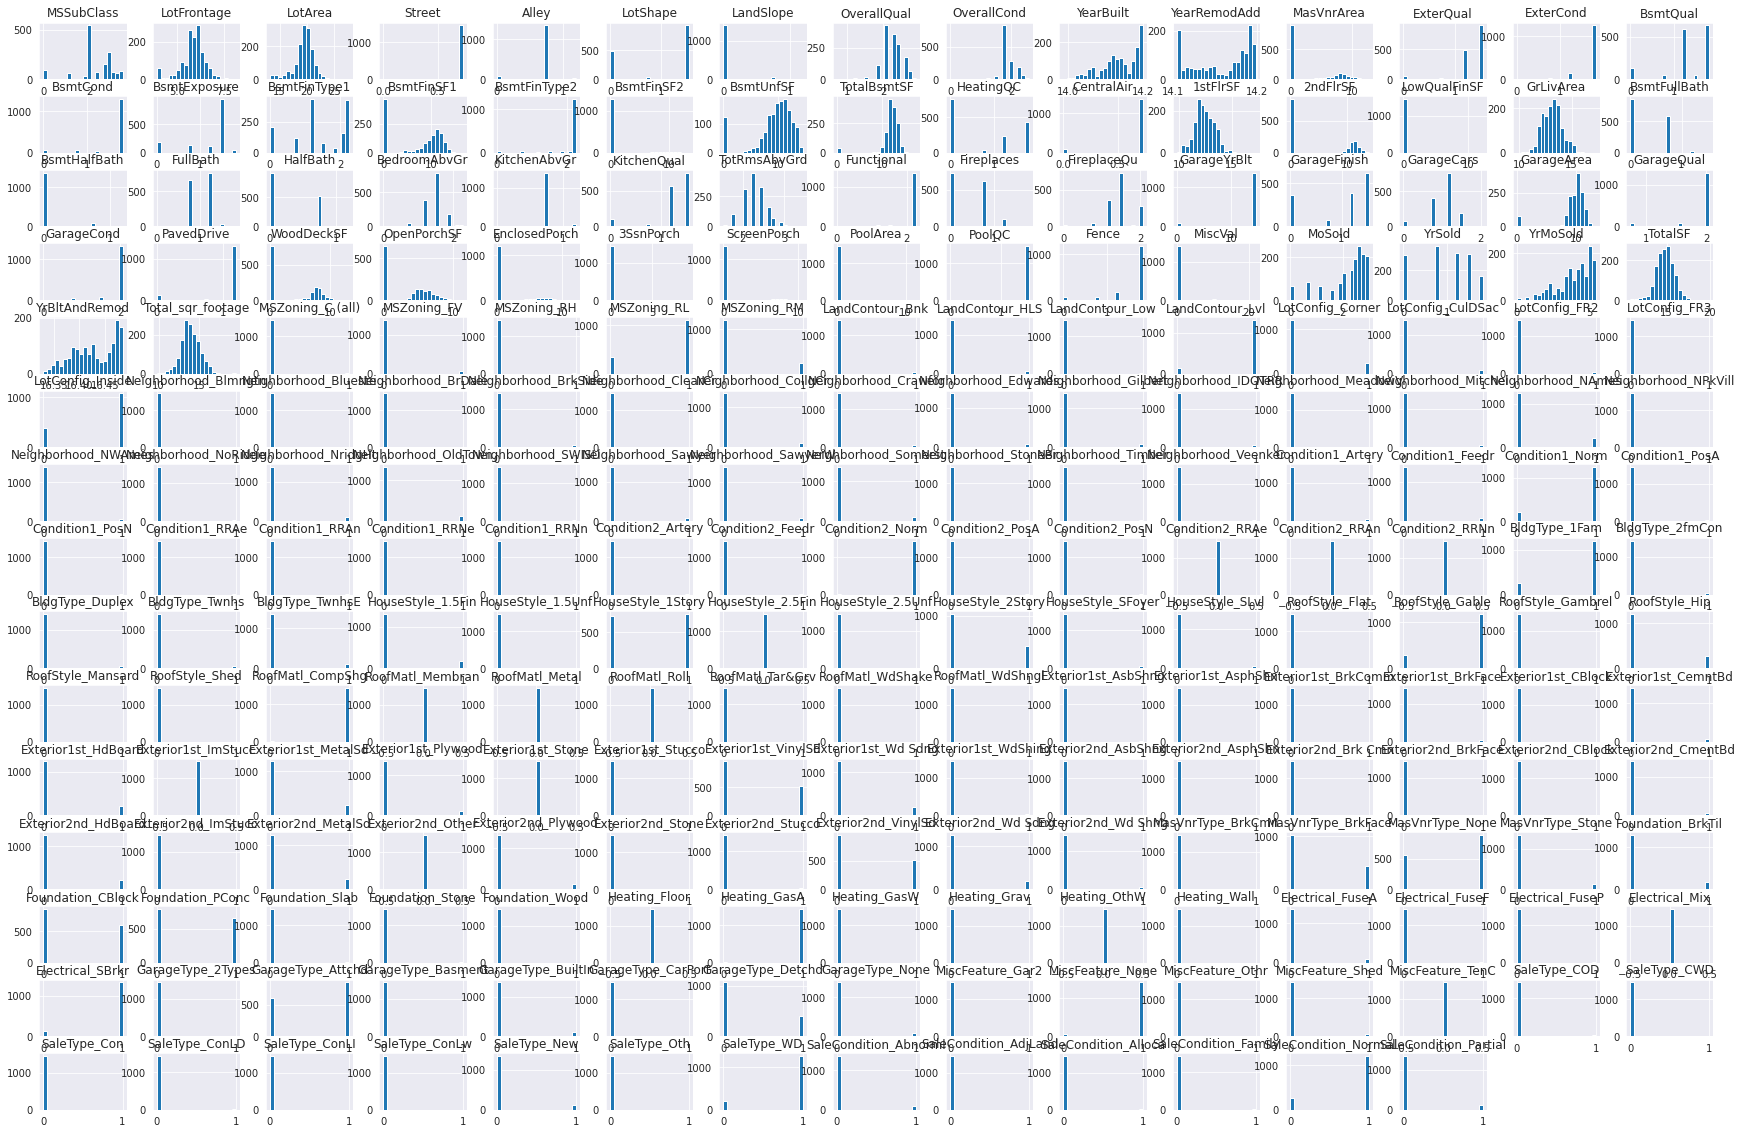

In [53]:
test.hist(bins=20, figsize=(30,20))
plt.show()

## 5.15 Brief Check

In [54]:
train.describe()

MSSubClass  LotFrontage  LotArea   Street    Alley  LotShape  \
count    1458.000     1458.000 1458.000 1458.000 1458.000  1458.000   
mean        2.305        5.898   19.549    0.727    0.718     1.006   
std         0.784        0.617    2.027    0.047    0.156     0.721   
min         0.000        3.933   12.879    0.000    0.000     0.000   
25%         2.056        5.685   18.776    0.730    0.730     0.000   
50%         2.260        5.969   19.660    0.730    0.730     1.541   
75%         2.886        6.225   20.472    0.730    0.730     1.541   
max         3.438        9.126   35.391    0.730    1.194     1.541   

       LandSlope  OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLw  \
count   1458.000     1458.000     1458.000   1458.000  ...        1458.000   
mean       0.043        2.255        1.939     14.137  ...           0.003   
std        0.186        0.267        0.259      0.048  ...           0.058   
min        0.000        0.730        0.000     13.977  ...           0.000   
25%        0.000        2.056        1.820     14.110  ...           0.000   
50%        0.000        2.260        1.820     14.140  ...           0.000   
75%        0.000        2.440        2.056     14.183  ...           0.000   
max        1.194        2.886        2.603     14.198  ...           1.000   

       SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
count      1458.000      1458.000     1458.000               1458.000   
mean          0.082         0.002        0.869                  0.069   
std           0.275         0.045        0.338                  0.254   
min           0.000         0.000        0.000                  0.000   
25%           0.000         0.000        1.000                  0.000   
50%           0.000         0.000        1.000                  0.000   
75%           0.000         0.000        1.000                  0.000   
max           1.000         1.000        1.000                  1.000   

       SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
count               1458.000              1458.000              1458.000   
mean                   0.003                 0.008                 0.014   
std                    0.052                 0.090                 0.116   
min                    0.000                 0.000                 0.000   
25%                    0.000                 0.000                 0.000   
50%                    0.000                 0.000                 0.000   
75%                    0.000                 0.000                 0.000   
max                    1.000                 1.000                 1.000   

       SaleCondition_Normal  SaleCondition_Partial  
count              1458.000               1458.000  
mean                  0.822                  0.084  
std                   0.383                  0.278  
min                   0.000                  0.000  
25%                   1.000                  0.000  
50%                   1.000                  0.000  
75%                   1.000                  0.000  
max                   1.000                  1.000  

[8 rows x 223 columns]

In [55]:
test.describe()

MSSubClass  LotFrontage  LotArea   Street    Alley  LotShape  \
count    1459.000     1459.000 1459.000 1459.000 1459.000  1459.000   
mean        2.290        5.867   19.428    0.727    0.707     1.009   
std         0.807        0.629    1.907    0.047    0.175     0.722   
min         0.000        3.933   13.242    0.000    0.000     0.000   
25%         2.056        5.685   18.698    0.730    0.730     0.000   
50%         2.056        5.942   19.629    0.730    0.730     1.541   
75%         2.886        6.221   20.443    0.730    0.730     1.541   
max         3.438        8.104   27.755    0.730    1.194     1.541   

       LandSlope  OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLw  \
count   1459.000     1459.000     1459.000   1459.000  ...        1459.000   
mean       0.032        2.250        1.931     14.137  ...           0.002   
std        0.154        0.281        0.277      0.048  ...           0.045   
min        0.000        0.730        0.000     13.989  ...           0.000   
25%        0.000        2.056        1.820     14.109  ...           0.000   
50%        0.000        2.260        1.820     14.140  ...           0.000   
75%        0.000        2.440        2.056     14.184  ...           0.000   
max        1.194        2.886        2.603     14.198  ...           1.000   

       SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
count      1459.000      1459.000     1459.000               1459.000   
mean          0.080         0.003        0.863                  0.061   
std           0.272         0.052        0.344                  0.239   
min           0.000         0.000        0.000                  0.000   
25%           0.000         0.000        1.000                  0.000   
50%           0.000         0.000        1.000                  0.000   
75%           0.000         0.000        1.000                  0.000   
max           1.000         1.000        1.000                  1.000   

       SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
count               1459.000              1459.000              1459.000   
mean                   0.005                 0.008                 0.018   
std                    0.074                 0.090                 0.132   
min                    0.000                 0.000                 0.000   
25%                    0.000                 0.000                 0.000   
50%                    0.000                 0.000                 0.000   
75%                    0.000                 0.000                 0.000   
max                    1.000                 1.000                 1.000   

       SaleCondition_Normal  SaleCondition_Partial  
count              1459.000               1459.000  
mean                  0.825                  0.082  
std                   0.380                  0.275  
min                   0.000                  0.000  
25%                   1.000                  0.000  
50%                   1.000                  0.000  
75%                   1.000                  0.000  
max                   1.000                  1.000  

[8 rows x 223 columns]

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 223 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(62), uint8(161)
memory usage: 935.6 KB


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1458 to 2916
Columns: 223 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(62), uint8(161)
memory usage: 936.2 KB


## 5.16 Adjusting Distributions

In [58]:
use_feature_selection = 0
if (use_feature_selection == 1):
    import pickle

    with open('X_train_sfs_50.pkl', 'rb') as fid:
        train = pickle.load(fid)
    with open('X_test_sfs_50.pkl', 'rb') as fid:
        test = pickle.load(fid)
    train = pd.DataFrame(train, index=train_ID)
    test = pd.DataFrame(test, index=test_ID)

In [59]:
norm = MinMaxScaler().fit(train)
train_norm_arr = norm.transform(train)
test_norm_arr = norm.transform(test)
train_norm = pd.DataFrame(norm.transform(train), index=train.index, columns=train.columns)
test_norm = pd.DataFrame(norm.transform(test), index=test.index, columns=test.columns)
train_norm

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
0          0.839        0.366    0.281   1.000  0.612     1.000      0.000   
1          0.598        0.441    0.304   1.000  0.612     1.000      0.000   
2          0.839        0.382    0.332   1.000  0.612     0.000      0.000   
3          0.876        0.337    0.303   1.000  0.612     0.000      0.000   
4          0.839        0.459    0.375   1.000  0.612     0.000      0.000   
...          ...          ...      ...     ...    ...       ...        ...   
1453       0.839        0.349    0.270   1.000  0.612     1.000      0.000   
1454       0.598        0.463    0.361   1.000  0.612     1.000      0.000   
1455       0.876        0.371    0.293   1.000  0.612     1.000      0.000   
1456       0.598        0.382    0.306   1.000  0.612     1.000      0.000   
1457       0.598        0.417    0.310   1.000  0.612     1.000      0.000   

      OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLw  SaleType_New  \
0           0.793        0.699      0.951  ...           0.000         0.000   
1           0.709        0.938      0.759  ...           0.000         0.000   
2           0.793        0.699      0.937  ...           0.000         0.000   
3           0.793        0.699      0.318  ...           0.000         0.000   
4           0.869        0.699      0.930  ...           0.000         0.000   
...           ...          ...        ...  ...             ...           ...   
1453        0.709        0.699      0.922  ...           0.000         0.000   
1454        0.709        0.790      0.773  ...           0.000         0.000   
1455        0.793        1.000      0.508  ...           0.000         0.000   
1456        0.615        0.790      0.573  ...           0.000         0.000   
1457        0.615        0.790      0.681  ...           0.000         0.000   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            0.000        1.000                  0.000                  0.000   
1            0.000        1.000                  0.000                  0.000   
2            0.000        1.000                  0.000                  0.000   
3            0.000        1.000                  1.000                  0.000   
4            0.000        1.000                  0.000                  0.000   
...            ...          ...                    ...                    ...   
1453         0.000        1.000                  0.000                  0.000   
1454         0.000        1.000                  0.000                  0.000   
1455         0.000        1.000                  0.000                  0.000   
1456         0.000        1.000                  0.000                  0.000   
1457         0.000        1.000                  0.000                  0.000   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                    0.000                 0.000                 1.000   
1                    0.000                 0.000                 1.000   
2                    0.000                 0.000                 1.000   
3                    0.000                 0.000                 0.000   
4                    0.000                 0.000                 1.000   
...                    ...                   ...                   ...   
1453                 0.000                 0.000                 1.000   
1454                 0.000                 0.000                 1.000   
1455                 0.000                 0.000                 1.000   
1456                 0.000                 0.000                 1.000   
1457                 0.000                 0.000                 1.000   

      SaleCondition_Partial  
0                     0.000  
1                     0.000  
2                     0.000  
3                     0.000  
4                     0.000  
...                     ...  
1453                  0.000  
1454  

In [60]:
test_norm

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
1458       0.598        0.441    0.338   1.000  0.612     1.000      0.000   
1459       0.598        0.445    0.375   1.000  0.612     0.000      0.000   
1460       0.839        0.412    0.369   1.000  0.612     0.000      0.000   
1461       0.839        0.431    0.310   1.000  0.612     0.000      0.000   
1462       0.000        0.224    0.194   1.000  0.612     0.000      0.000   
...          ...          ...      ...     ...    ...       ...        ...   
2912       0.347        0.000    0.053   1.000  0.612     1.000      0.000   
2913       0.347        0.000    0.050   1.000  0.612     1.000      0.000   
2914       0.598        0.710    0.440   1.000  0.612     1.000      0.000   
2915       0.972        0.349    0.318   1.000  0.612     1.000      0.000   
2916       0.839        0.412    0.304   1.000  0.612     1.000      0.612   

      OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLw  SaleType_New  \
1458        0.615        0.790      0.652  ...           0.000         0.000   
1459        0.709        0.790      0.630  ...           0.000         0.000   
1460        0.615        0.699      0.908  ...           0.000         0.000   
1461        0.709        0.790      0.915  ...           0.000         0.000   
1462        0.869        0.699      0.873  ...           0.000         0.000   
...           ...          ...        ...  ...             ...           ...   
2912        0.506        0.868      0.716  ...           0.000         0.000   
2913        0.506        0.699      0.716  ...           0.000         0.000   
2914        0.615        0.868      0.645  ...           0.000         0.000   
2915        0.615        0.699      0.873  ...           0.000         0.000   
2916        0.793        0.699      0.880  ...           0.000         0.000   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
1458         0.000        1.000                  0.000                  0.000   
1459         0.000        1.000                  0.000                  0.000   
1460         0.000        1.000                  0.000                  0.000   
1461         0.000        1.000                  0.000                  0.000   
1462         0.000        1.000                  0.000                  0.000   
...            ...          ...                    ...                    ...   
2912         0.000        1.000                  0.000                  0.000   
2913         0.000        1.000                  1.000                  0.000   
2914         0.000        1.000                  1.000                  0.000   
2915         0.000        1.000                  0.000                  0.000   
2916         0.000        1.000                  0.000                  0.000   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1458                 0.000                 0.000                 1.000   
1459                 0.000                 0.000                 1.000   
1460                 0.000                 0.000                 1.000   
1461                 0.000                 0.000                 1.000   
1462                 0.000                 0.000                 1.000   
...                    ...                   ...                   ...   
2912                 0.000                 0.000                 1.000   
2913                 0.000                 0.000                 0.000   
2914                 0.000                 0.000                 0.000   
2915                 0.000                 0.000                 1.000   
2916                 0.000                 0.000                 1.000   

      SaleCondition_Partial  
1458                  0.000  
1459                  0.000  
1460                  0.000  
1461                  0.000  
1462                  0.000  
...                     ...  
2912                  0.000  
2913  

In [61]:
train_stand = train.copy()
test_stand = test.copy()

for i in all_numerical:
    # fit on training data column
    scale = StandardScaler().fit(train_stand[[i]])
    # transform the training data column
    train_stand[i] = scale.transform(train_stand[[i]])
    # transform the testing data column
    test_stand[i] = scale.transform(test_stand[[i]])

In [62]:
train_stand

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
0          0.741       -0.108   -0.166   0.730  0.730     1.541      0.000   
1         -0.319        0.524    0.080   0.730  0.730     1.541      0.000   
2          0.741        0.027    0.394   0.730  0.730     0.000      0.000   
3          0.901       -0.346    0.070   0.730  0.730     0.000      0.000   
4          0.741        0.675    0.876   0.730  0.730     0.000      0.000   
...          ...          ...      ...     ...    ...       ...        ...   
1453       0.741       -0.249   -0.291   0.730  0.730     1.541      0.000   
1454      -0.319        0.712    0.713   0.730  0.730     1.541      0.000   
1455       0.901       -0.063   -0.036   0.730  0.730     1.541      0.000   
1456      -0.319        0.027    0.104   0.730  0.730     1.541      0.000   
1457      -0.319        0.325    0.148   0.730  0.730     1.541      0.000   

      OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLw  SaleType_New  \
0           0.692       -0.457      1.048  ...               0             0   
1           0.016        1.937      0.164  ...               0             0   
2           0.692       -0.457      0.983  ...               0             0   
3           0.692       -0.457     -1.871  ...               0             0   
4           1.300       -0.457      0.950  ...               0             0   
...           ...          ...        ...  ...             ...           ...   
1453        0.016       -0.457      0.918  ...               0             0   
1454        0.016        0.452      0.230  ...               0             0   
1455        0.692        2.564     -0.997  ...               0             0   
1456       -0.748        0.452     -0.697  ...               0             0   
1457       -0.748        0.452     -0.199  ...               0             0   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0                0            1                      0                      0   
1                0            1                      0                      0   
2                0            1                      0                      0   
3                0            1                      1                      0   
4                0            1                      0                      0   
...            ...          ...                    ...                    ...   
1453             0            1                      0                      0   
1454             0            1                      0                      0   
1455             0            1                      0                      0   
1456             0            1                      0                      0   
1457             0            1                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1453                     0                     0                     1   
1454                     0                     0                     1   
1455                     0                     0                     1   
1456                     0                     0                     1   
1457                     0                     0                     1   

      SaleCondition_Partial  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
1453                      0  
1454  

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📓 Modeling</b></div>


# 📓 6. Modeling

In [63]:
method = 'stacked'

import random as rn
rn.seed(1) # random
from numpy.random import seed
seed(7) # or 7
import tensorflow as tf
tf.random.set_seed(0)

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Neural Network Based Model</b></div>

In [64]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop   #for adam optimizer
def baseline_model(dim=223, opt_sel="adam", learning_rate = 0.001, neurons = 1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, decay = 0.0002, momentum=0.9):
    def bm():
        # create model
        model = Sequential()
        #model.add(Dense(neurons, input_dim=223, kernel_initializer='normal', activation='relu'))
        model.add(Dense(neurons, input_dim=dim, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))
        #model.add(Dense(1, kernel_initializer='normal')) # added to v86
        # Compile model
        if (opt_sel == "adam"):
            #opt = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, amsgrad=amsgrad) # added to v86
            opt = Adam(lr=learning_rate)
        elif(opt_sel == "sgd"):
            opt = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay, nesterov=True)
        model.compile(loss='mean_squared_error', optimizer=opt)
        return model
    return bm

In [65]:
train_inputs =  preprocessing.scale(train)
n_cols = train_inputs.shape[1]
input_shape = (n_cols, )
# Creates a model given an activation and learning rate
# Create the model object with default arguments
def create_model(learning_rate = 0.001, activation='relu'):
  
    # Set Adam optimizer with the given learning rate
    opt = Adam(lr = learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(128,
                    activation = activation,
                    input_shape = input_shape,
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(128,
                    activation = activation, 
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = activation))
    # Compile the model
    model.compile(optimizer = opt,
                  #loss = "mean_absolute_error",
                  loss = "mean_squared_error",
                  metrics = ['mse', "mape"])
    return model

In [66]:
optimize_nn = 0
if (optimize_nn == 1):
    # Create a KerasClassifier object
    model = KerasRegressor(build_fn = create_model,
                           verbose = 0)
    # Define the hyperparameter space
    params = {'activation': ["relu"],#, "tanh"],
              'batch_size': [1, 4],#, 2, 4], 
              'epochs': [100, 150, 200],
              'neurons':[8, 16, 32],
              'learning_rate': [0.01, 0.005, 0.001]}
    # Create a randomize search cv object 
    random_search = RandomizedSearchCV(model,
                                       param_distributions = params,
                                       cv = KFold(10))
    random_search_results = random_search.fit(train_inputs, y_train)
    print("Best Score: ",
          random_search_results.best_score_,
          "and Best Params: ",
          random_search_results.best_params_)

In [67]:
if (optimize_nn == 1):
    model = KerasRegressor(build_fn = create_model,
                           epochs = 100, 
                           batch_size = 16,
                           verbose = 0)
    # Calculate the accuracy score for each fold
    kfolds = cross_val_score(model,
                             train_inputs,
                             train_targets,
                             cv = 10)
    # Print the mean accuracy
    print('The mean accuracy was:', kfolds.mean())
    # Print the accuracy standard deviation
    print('With a standard deviation of:', kfolds.std())

In [68]:
# define variable learning rate function
def step_decay(epoch, lr):
    drop = 0.995 # was .999
    epochs_drop = 175.0 # was 175, sgd likes 200+, adam likes 100
    lrate = lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    print("epoch=" + str(epoch) + " lr=" + str(lr) + " lrate=" + str(lrate))
    return lrate

In [69]:
class CustomCallback(keras.callbacks.Callback):
    def __init__(self, train=None, validation=None):
        super(CustomCallback, self).__init__()
        self.validation = validation
        self.train = train
        
    def on_train_begin(self, logs={}):
        #val_loss_hist = []
        #train_loss_hist = []
        #lr_hist = []
        self.val_loss_hist   = []
        self.train_loss_hist = []
        self.lr_hist         = []
    
    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        #val_loss_hist.append([logs['val_loss']])
        #train_loss_hist.append([logs['loss']])
        #lr_hist.append([logs['lr']])
        self.val_loss_hist.append([logs['val_loss']])
        self.train_loss_hist.append([logs['loss']])
        self.lr_hist.append([logs['lr']])
        #print("End epoch {} of training; got log keys: {}".format(epoch, keys))
        
logging_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print('val_loss:', logs['val_loss'])
)

In [70]:
# evaluate model # .0005 -> 54, .001 -> 53, .005 -> 48, .01 -> 55
lrate = LearningRateScheduler(step_decay)
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='auto', restore_best_weights = True)
dnn_history = CustomCallback()
callbacks_list = [lrate, early_stopping, dnn_history] 
# num_epochs = 1000 # added in v86
num_epochs = 100
keras_optimizer = "adam"

if (keras_optimizer == "adam"): # train loss 47, val loss 70
    # v86 had learning_rate = 0.001, batch size 2
    dnn = KerasRegressor(build_fn=baseline_model(dim=223, opt_sel=keras_optimizer, learning_rate = 0.005, neurons = 8, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), epochs=num_epochs, batch_size=1, verbose=1)
    #dnn_meta = KerasRegressor(build_fn=baseline_model(dim=5, opt_sel=keras_optimizer, learning_rate = 0.001, neurons = 8, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), epochs=num_epochs, batch_size=2, verbose=1)

elif (keras_optimizer == "sgd"): # loss 27, val loss 69
    dnn = KerasRegressor(build_fn=baseline_model(dim=223, opt_sel=keras_optimizer, learning_rate=0.000005, neurons=32, decay=0.000001, momentum=0.9), epochs=num_epochs, batch_size=8, verbose=1)
    # can't get sgd to give decent results, only adam works as a metamodel
    #dnn_meta = KerasRegressor(build_fn=baseline_model(dim=5, opt_sel=keras_optimizer, learning_rate=0.000005, neurons=32, decay=0.000001, momentum=0.9), epochs=num_epochs, batch_size=8, verbose=1)

dnn_meta = KerasRegressor(build_fn=baseline_model(dim=5, opt_sel="adam", learning_rate = 0.001, neurons = 8, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), epochs=num_epochs, batch_size=2, verbose=1)
    
if (optimize_nn == 1):
    kfold = KFold(n_splits=10)
    results = cross_val_score(dnn, train, y_train, cv=kfold)
    print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [71]:
dnn.fit(train, y_train)
dnn_train_pred = inv_boxcox1p(dnn.predict(train), lam_l)
dnn_pred = inv_boxcox1p(dnn.predict(test), lam_l)

2022-10-23 12:42:00.775681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 12:42:00.779755: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 12:42:00.780463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 12:42:00.781864: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100
1458/1458 [==============================] - 3s 1ms/step - loss: 1451.2518
Epoch 2/100
1458/1458 [==============================] - 2s 2ms/step - loss: 167.9711
Epoch 3/100
1458/1458 [==============================] - 2s 1ms/step - loss: 124.8400
Epoch 4/100
1458/1458 [==============================] - 2s 1ms/step - loss: 106.4572
Epoch 5/100
1458/1458 [==============================] - 2s 1ms/step - loss: 96.5294
Epoch 6/100
1458/1458 [==============================] - 2s 1ms/step - loss: 89.8923
Epoch 7/100
1458/1458 [==============================] - 2s 1ms/step - loss: 86.1884
Epoch 8/100
1458/1458 [==============================] - 2s 1ms/step - loss: 80.8665
Epoch 9/100
1458/1458 [==============================] - 2s 1ms/step - loss: 79.6915
Epoch 10/100
1458/1458 [==============================] - 2s 1ms/step - loss: 77.2393
Epoch 11/100
1458/1458 [==============================] - 2s 1ms/step - loss: 76.7780
Epoch 12/100
1458/1458 [==============================] - 

In [72]:
n_folds=5 # was 5 => better score but twice as slow now

def rmsle_cv(model):
    print("running rmsle_cv code")
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train) # was 42
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf)) # also r2
    print("raw rmse scores for each fold:", rmse)
    return(rmse)

def r2_cv(model):
    print("running r2_cv code")
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train) # was 42
    r2= cross_val_score(model, train, y_train, scoring="r2", cv = kf) # also r2
    print("raw r2 scores for each fold:", r2)
    return(r2)

# used for another competition
def mae_cv(model):
    print("running mae_cv code")
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train) # was 42
    mae = -cross_val_score(model, train, y_train, scoring="neg_mean_absolute_error", cv = kf) # also r2
    print("raw mae scores for each fold:", mae)
    return(mae)

def all_cv(model, n_folds, cv):
    print("running cross_validate")
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train) # was 42
    # other scores: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scorers = {
        'r2': 'r2',
        'nmsle': 'neg_mean_squared_log_error', 
        'nmse': 'neg_mean_squared_error',
        'mae': 'neg_mean_absolute_error'
    }
    scores = cross_validate(model, train, y_train, scoring=scorers,
                           cv=kf, return_train_score=True)
    return(scores)

In [73]:
def runGSCV(num_trials, features, y_values):
    non_nested_scores = np.zeros(num_trials) # INCREASES BIAS
    nested_scores = np.zeros(num_trials)
    # Loop for each trial
    for i in range(num_trials):
        print("Running GridSearchCV:")
        with MyTimer():    
            #grid_result = gsc.fit(train, y_train)  
            grid_result = gsc.fit(features, y_values)  
        non_nested_scores[i] = grid_result.best_score_
        if (competition == 'SR'):
            print("Best mae %f using %s" % ( -grid_result.best_score_, grid_result.best_params_))
        else:
            print("Best rmse %f using %s" % ( np.sqrt(-grid_result.best_score_), grid_result.best_params_))
        
        # nested/non-nested cross validation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html
        with MyTimer():    
            #nested_score = cross_val_score(gsc, X=train, y=y_train, cv=outer_cv, verbose=0).mean() 
            nested_score = cross_val_score(gsc, X=features, y=y_values, cv=outer_cv, verbose=0).mean() 
            # source code for cross_val_score is here: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/model_selection/_validation.py#L137
        if (competition == 'SR'):
            print("nested mae score from KFold %0.3f" % -nested_score)
        else:
            print("nested rmse score from KFold %0.3f" % np.sqrt(-nested_score))
        
        nested_scores[i] = nested_score
        print('grid_result',grid_result)
        print("mean scores: r2(%0.3f) mae(%0.3f) nmse(%0.3f) nmsle(%0.3f)" % (grid_result.cv_results_['mean_test_r2'].mean(), -grid_result.cv_results_['mean_test_mae'].mean(),  np.sqrt(-grid_result.cv_results_['mean_test_nmse'].mean()), grid_result.cv_results_['mean_test_nmsle'].mean() ))
        #print("mean scores: r2(%0.3f) nmse(%0.3f) mae(%0.3f)" % (grid_result.cv_results_['mean_test_r2'].mean(), np.sqrt(-grid_result.cv_results_['mean_test_nmse'].mean()), grid_result.cv_results_['mean_test_mae'].mean()))
    return grid_result


In [74]:
def calc_all_scores(model, n_folds=5, cv=5):
    scores = all_cv(model, n_folds, cv)
    #scores['train_<scorer1_name>'']
    #scores['test_<scorer1_name>'']
    print("\n mae_cv score: {:.4f} ({:.4f})\n".format( (-scores['test_mae']).mean(), scores['test_mae'].std() ))
    print("\n rmsle_cv score: {:.4f} ({:.4f})\n".format( (np.sqrt(-scores['test_nmse'])).mean(), scores['test_nmse'].std() ))
    print("\n r2_cv score: {:.4f} ({:.4f})\n".format( scores['test_r2'].mean(), scores['test_r2'].std() ))
    return (scores)

# useful when you can't decide on parameter setting from best_params_
# result_details(grid_result,'mean_test_nmse',100)
def result_details(grid_result,sorting='mean_test_nmse',cols=100):
    param_df = pd.DataFrame.from_records(grid_result.cv_results_['params'])
    param_df['mean_test_nmse'] = np.sqrt(-grid_result.cv_results_['mean_test_nmse'])
    param_df['std_test_nmse'] = np.sqrt(grid_result.cv_results_['std_test_nmse'])
    param_df['mean_test_mae'] = -grid_result.cv_results_['mean_test_mae']
    param_df['std_test_mae'] = -grid_result.cv_results_['std_test_mae']
    param_df['mean_test_r2'] = -grid_result.cv_results_['mean_test_r2']
    param_df['std_test_r2'] = -grid_result.cv_results_['std_test_r2']
    return param_df.sort_values(by=[sorting]).tail(cols)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def mae(y, y_pred):
    return mean_absolute_error(y,y_pred)

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Lasso Regression Model</b></div>

In [75]:
# initialize the algorithm for the GridSearchCV function
lasso = Lasso()
tuningLasso = 1 # takes 2 minutes to complete

if (tuningLasso == 1):
    # use this when tuning
    param_grid={
        'alpha':[0.01,], # done, lower keeps getting better, but don't want to go too low and begin overfitting (alpha is related to L1 reg)
        'fit_intercept':[True], # done, big difference
        'normalize':[False], # done, big difference
        'precompute':[False], # done, no difference
        'copy_X':[True], # done, no difference
        'max_iter':[200], # done
        'tol':[0.05], # done, not much difference # was 0.005 but that would cause error: ConvergenceWarning: Objective did not converge
        'warm_start':[False], # done, no difference
        'positive':[False], # done, big difference
        'random_state':[1],
        'selection':['cyclic'] # done both are same, cyclic is default
    }

else:
    # use this when not tuning
    param_grid={
        'alpha':[0.2], 
        'fit_intercept':[True],
        'normalize':[False],
        'precompute':[False],
        'copy_X':[True],
        'max_iter':[200],
        'tol':[0.0001],
        'warm_start':[False],
        'positive':[False],
        'random_state':[None],
        'selection':['cyclic']
    }

scorers = {
    'r2': 'r2',
    'nmsle': 'neg_mean_squared_log_error', 
    'nmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}
# To be used within GridSearch 
inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

# To be used in outer CV 
outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

#inner loop KFold example:
gsc = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    #scoring='neg_mean_squared_error', # 'roc_auc', # or 'r2', etc
    scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
    #scoring='neg_mean_squared_error', # or look here for other choices 
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #cv=5,
    cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
    verbose=0,
    return_train_score=True, # keep the other scores
    refit='nmse' # use this one for optimizing
)

grid_result = runGSCV(2, train, y_train)

rd = result_details(grid_result,'random_state',100)
rd[['random_state','alpha','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']].sort_values(by=['random_state','alpha'])


Running GridSearchCV:
The function took 0.28461694717407227 seconds to complete
Best mae 77.624150 using {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 200, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.05, 'warm_start': False}
The function took 0.936560869216919 seconds to complete
nested mae score from KFold 78.607
grid_result GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.01], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [200],
                         'normalize': [False], 'positive': [False],
                         'precompute': [False], 'random_state': [1],
                         'selection': ['cyclic'], 'tol': [0.05],
                         'warm_start': [False]},
             refit='nmse', return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_erro

random_state  alpha  mean_test_nmse  std_test_nmse  mean_test_mae  \
0             1  0.010           9.042          2.156          6.495   

   std_test_mae  mean_test_r2  std_test_r2  
0        -0.176        -0.892       -0.011

In [76]:
tuning_lasso = 1
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, tol=0.05, random_state=1)) # was 1 
lasso_new = make_pipeline(RobustScaler(), Lasso(**grid_result.best_params_))

In [77]:
if (tuning_lasso == 1):
    #TEMP
    model_results = [] # model flow, mae, rmsle
    models = [lasso, lasso_new]

    for model in models:
        #print(model)
        with MyTimer(): 
            scores = calc_all_scores(model,5,5)
        #print("------------------------------------------")
        model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

    df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
    df_mr.sort_values(by=['rmsle'])

running cross_validate

 mae_cv score: 6.1747 (0.2965)


 rmsle_cv score: 8.8612 (10.3570)


 r2_cv score: 0.8966 (0.0070)

The function took 0.6387453079223633 seconds to complete
running cross_validate

 mae_cv score: 5.8716 (0.3255)


 rmsle_cv score: 8.2973 (9.8885)


 r2_cv score: 0.9093 (0.0077)

The function took 0.6827948093414307 seconds to complete


In [78]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, tol=0.05, random_state=1)) # was 1 

if (tuning_lasso == 1):
    for i in [2,5,20,42,99]:
        from sklearn.linear_model import Lasso
        print('random_state =',i)

        l = {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 200, 'normalize': False, 'positive': False, 'precompute': False, 'selection': 'cyclic', 'tol': 0.05, 'warm_start': False}
        lasso_new = make_pipeline(RobustScaler(), Lasso(**l, random_state=i))
        #lasso_new = Lasso(**l, random_state=i)

        model_results = [] # model flow, mae, rmsle
        models = [lasso, lasso_new]

        for model in models:
            #print(model)
            with MyTimer(): 
                scores = calc_all_scores(model,5,5)
            #print("------------------------------------------")
            model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

        df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
        print(df_mr.sort_values(by=['rmsle']))
else:
    lasso_new = make_pipeline(RobustScaler(), Lasso(**grid_result.best_params_, random_state=i))

random_state = 2
running cross_validate

 mae_cv score: 6.1747 (0.2965)


 rmsle_cv score: 8.8612 (10.3570)


 r2_cv score: 0.8966 (0.0070)

The function took 0.6119649410247803 seconds to complete
running cross_validate

 mae_cv score: 5.8716 (0.3255)


 rmsle_cv score: 8.2973 (9.8885)


 r2_cv score: 0.9093 (0.0077)

The function took 0.7758910655975342 seconds to complete
                                               model   mae  rmsle    r2
1  (RobustScaler(), Lasso(alpha=0.01, max_iter=20... 5.872  8.297 0.909
0  (RobustScaler(), Lasso(alpha=0.0005, random_st... 6.175  8.861 0.897
random_state = 5
running cross_validate

 mae_cv score: 6.1747 (0.2965)


 rmsle_cv score: 8.8612 (10.3570)


 r2_cv score: 0.8966 (0.0070)

The function took 0.6012063026428223 seconds to complete
running cross_validate

 mae_cv score: 5.8716 (0.3255)


 rmsle_cv score: 8.2973 (9.8885)


 r2_cv score: 0.9093 (0.0077)

The function took 0.6682817935943604 seconds to complete
                            

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Elastic Net Regression Model</b></div>

In [79]:
# initialize the algorithm for the GridSearchCV function
if (method == "ensemble"):
    enet_tol = 0.01 # or try 0.01 - default is 0.0001
    ENet = ElasticNet(tol=enet_tol) # added tol=0.05 to avoid errors
    tuningENet = 0 # takes 2 minutes to complete

    if (tuningENet == 1):
        # use this when tuning
        param_grid={
            'alpha':[0.01],
            'l1_ratio':[0.75,0.8,0.85,0.9],
            'fit_intercept':[True], # ,False
            'normalize':[False], # True,
            'max_iter':range(350,450,50),
            'selection':['random'], # 'cyclic',
            'random_state':[3],
            'tol':[enet_tol]
        }

    else:
        # use this when not tuning
        param_grid={
            'alpha':[0.01],
            'l1_ratio':[.9],
            'fit_intercept':[True],
            'normalize':[False],
            'max_iter':[350], # default 1000
            'selection':['random'],
            'random_state':[3],
            'tol':[enet_tol]
        }

else: # (method == "stacked")
    enet_tol = 0.0001 # or try 0.01 
    ENet = ElasticNet() # added tol=0.05 to avoid errors
    tuningENet = 0 # takes 2 minutes to complete

    if (tuningENet == 1):
        # use this when tuning
        param_grid={
            'alpha':[0.01,0.05],
            'l1_ratio':[0.8,0.85,0.9],
            'fit_intercept':[True], # ,False
            'normalize':[False], # True,
            'max_iter':range(350,450,50),
            'selection':['random'], # 'cyclic',
            'random_state':[3],
            'tol':[enet_tol]
        }

    else:
        # use this when not tuning
        param_grid={
            'alpha':[0.05],
            'l1_ratio':[.85],
            'fit_intercept':[True],
            'normalize':[False],
            'max_iter':[500], # default 1000
            'selection':['random'],
            'random_state':[3],
            'tol':[enet_tol]
        }

scorers = {
    'r2': 'r2',
    'nmsle': 'neg_mean_squared_log_error',
    'nmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}
# To be used within GridSearch 
inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

# To be used in outer CV 
outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

#inner loop KFold example:
gsc = GridSearchCV(
    estimator=ENet,
    param_grid=param_grid,
    scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
    #scoring='neg_mean_squared_error', # or look here for other choices 
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #cv=5,
    cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
    verbose=0,
    return_train_score=True, # keep the other scores
    refit='nmse' # use this one for optimizing
)

grid_result = runGSCV(5, train, y_train)

rd = result_details(grid_result,'mean_test_nmse',100)
rd[['max_iter','l1_ratio','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']]#.sort_values(by=['n_estimators','mean_test_nmse'])


Running GridSearchCV:
The function took 0.41309618949890137 seconds to complete
Best mae 65.543828 using {'alpha': 0.05, 'fit_intercept': True, 'l1_ratio': 0.85, 'max_iter': 500, 'normalize': False, 'random_state': 3, 'selection': 'random', 'tol': 0.0001}
The function took 1.9674599170684814 seconds to complete
nested mae score from KFold 66.112
grid_result GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.05], 'fit_intercept': [True],
                         'l1_ratio': [0.85], 'max_iter': [500],
                         'normalize': [False], 'random_state': [3],
                         'selection': ['random'], 'tol': [0.0001]},
             refit='nmse', return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'nmse': 'neg_mean_squared_error',
                      'nmsle': 'neg_mean_squared_log_error', 'r2': 'r2'})
mean scores: r2(0.914) mae(5.7

max_iter  l1_ratio  mean_test_nmse  std_test_nmse  mean_test_mae  \
0       500     0.850           8.067          2.547          5.683   

   std_test_mae  mean_test_r2  std_test_r2  
0        -0.234        -0.914       -0.012

In [80]:
rd = result_details(grid_result,'mean_test_nmse',100)
rd[['max_iter','l1_ratio','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']].sort_values(by=['max_iter','l1_ratio'])


max_iter  l1_ratio  mean_test_nmse  std_test_nmse  mean_test_mae  \
0       500     0.850           8.067          2.547          5.683   

   std_test_mae  mean_test_r2  std_test_r2  
0        -0.234        -0.914       -0.012

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Linear Regression Model</b></div>

In [81]:
# initialize the algorithm for the GridSearchCV function
lr1 = LinearRegression()
tuningLR = 0 # takes 2 minutes to complete

if (tuningLR == 1):
    # use this when tuning
    param_grid={
        'fit_intercept':[True,False], 
        'normalize':[True,False]
    }

else:
    # use this when not tuning
    param_grid={
        'fit_intercept':[False], 
        'normalize':[False]
    }

scorers = {
    'r2': 'r2',
    #'nmsle': 'neg_mean_squared_log_error',
    'nmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}
# To be used within GridSearch 
inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

# To be used in outer CV 
outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

#inner loop KFold example:
gsc = GridSearchCV(
    estimator=lr1,
    param_grid=param_grid,
    scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
    #scoring='neg_mean_squared_error', # or look here for other choices 
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #cv=5,
    cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
    verbose=0,
    return_train_score=True, # keep the other scores
    refit='nmse' # use this one for optimizing
)

grid_result = gsc.fit(train, y_train) 
#grid_result = runGSCV(2, train, y_train)

rd = result_details(grid_result,'mean_test_nmse',100)
rd[['fit_intercept','normalize','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']]#.sort_values(by=['n_estimators','mean_test_nmse'])


fit_intercept  normalize  mean_test_nmse  std_test_nmse  mean_test_mae  \
0          False      False         145.227        178.649         19.839   

   std_test_mae  mean_test_r2  std_test_r2  
0       -15.123        26.779      -42.229

In [82]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
lr1 = LinearRegression(fit_intercept=True,normalize=False) # defaults fit_intercept=True, normalize=False
from sklearn.feature_selection import f_regression, f_classif
#lr_poly = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", LinearRegression(fit_intercept=True,normalize=False))])

# using PCA
lr_poly = Pipeline([("polynomial_features", polynomial_features), ('reduce_dim', PCA(n_components=360)), ("linear_regression", LinearRegression())])

trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(train)
print(data)
print(data.shape)

[[1.         2.88584647 5.83132789 ... 1.         0.         0.        ]
 [1.         2.05564154 6.22121363 ... 1.         0.         0.        ]
 [1.         2.88584647 5.91494002 ... 1.         0.         0.        ]
 ...
 [1.         3.01134024 5.85955121 ... 1.         0.         0.        ]
 [1.         2.05564154 5.91494002 ... 1.         0.         0.        ]
 [1.         2.05564154 6.0986261  ... 1.         0.         0.        ]]
(1458, 25200)


<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Ridge Regression Model</b></div>

In [83]:
tune_kr = 1
if (tune_kr == 1):
    # initialize the algorithm for the GridSearchCV function
    KRR = KernelRidge()
    tuningKRR = 0 # this took 40 mins, 20 per iteration

    if (tuningKRR == 1):
        # use this when tuning
        param_grid={
            'alpha':[2.2,2.4], 
            'kernel':['polynomial'], #for entire list see: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.kernel_metrics.html#sklearn.metrics.pairwise.kernel_metrics
            'gamma':[0.0001,0.001,0.01,0.1],
            'degree':[1,2,3,4,5,6], 
            'coef0':[0.1,0.3,0.5,1.0,2.0]
        }

    else:
        # use this when not tuning
        # nmse: Best mae 583416973.611280 using {'alpha': 2.2, 'coef0': 0.5, 'degree': 5, 'gamma': 0.001, 'kernel': 'polynomial'}
        # mae: Best mae 15805.764347 using {'alpha': 2.0, 'coef0': 0.1, 'degree': 5, 'gamma': 0.001, 'kernel': 'polynomial'}
        param_grid={
            'alpha':[2.2], 
            'kernel':['polynomial'], # 'linear', 'rbf'
            'gamma':[0.001],
            'degree':[4], 
            'coef0':[1.0]
        }
    scorers = {
        'r2': 'r2',
        'nmsle': 'neg_mean_squared_log_error',
        'nmse': 'neg_mean_squared_error',
        'mae': 'neg_mean_absolute_error'
    }
    # To be used within GridSearch 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)
    # To be used in outer CV 
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

    #inner loop KFold example:
    gsc = GridSearchCV(
        estimator=KRR,
        param_grid=param_grid,
        scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
        #scoring='neg_mean_squared_error', # or look here for other choices 
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        #cv=5,
        cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
        verbose=0,
        return_train_score=True, # keep the other scores
        refit='nmse' # use this one for optimizing
    )

    grid_result = runGSCV(2, train, y_train)

    rd = result_details(grid_result,'mean_test_nmse',100)
    rd[['alpha','degree','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']]#.sort_values(by=['n_estimators','mean_test_nmse'])


Running GridSearchCV:
The function took 1.2526216506958008 seconds to complete
Best mae 59.840428 using {'alpha': 2.2, 'coef0': 1.0, 'degree': 4, 'gamma': 0.001, 'kernel': 'polynomial'}
The function took 3.6063742637634277 seconds to complete
nested mae score from KFold 58.816
grid_result GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=KernelRidge(),
             param_grid={'alpha': [2.2], 'coef0': [1.0], 'degree': [4],
                         'gamma': [0.001], 'kernel': ['polynomial']},
             refit='nmse', return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'nmse': 'neg_mean_squared_error',
                      'nmsle': 'neg_mean_squared_log_error', 'r2': 'r2'})
mean scores: r2(0.920) mae(5.487) nmse(7.736) nmsle(-0.002)
Running GridSearchCV:
The function took 1.2427189350128174 seconds to complete
Best mae 56.849013 using {'alpha': 2.2, 'coef0': 1.0, 'degree': 4, 'gamma': 0.001, 'k

In [84]:
krr = {'alpha': 2.2, 'coef0': 0.5, 'degree': 5, 'gamma': 0.001, 'kernel': 'polynomial'}
KRR = KernelRidge(**krr)
#KRR = KernelRidge(alpha=2.2, coef0=0.5, degree=5, gamma=0.001, kernel='polynomial')

if (tune_kr == 1):
    KRR_new = KernelRidge(**grid_result.best_params_)
else:
    krr_new = {'alpha': 2.3, 'coef0': 1.0, 'degree': 4, 'gamma': 0.001, 'kernel': 'polynomial'}
    KRR_new = KernelRidge(**krr)

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Random Forest Regression Model</b></div>

In [85]:
# initialize the algorithm for the GridSearchCV function
rf = RandomForestRegressor()
tuningRF = 0 # this took 2 hours last time, 1 hour per iteration

if (tuningRF == 1):
    # use this when tuning
    param_grid={
        'max_depth':[3,4,5],
        'max_features':[None,'sqrt','log2'], 
        # 'max_features': range(50,401,50),
        # 'max_features': [50,100], # can be list or range or other
        'n_estimators':range(25,100,25), 
        #'class_weight':[None,'balanced'],  
        'min_samples_leaf':range(5,15,5), 
        'min_samples_split':range(10,30,10), 
        'criterion':['mse', 'mae'] 
    }

else:
    # use this when not tuning
    param_grid={
        'max_depth':[5],
        'max_features':[None], # max_features is None is default and works here, removing 'sqrt','log2'
        # 'max_features': range(50,401,50),
        # 'max_features': [50,100], # can be list or range or other
        'n_estimators': [50], # number of trees selecting 100, removing range(50,126,25)
        #'class_weight':[None], # None was selected, removing 'balanced'
        'min_samples_leaf': [5], #selecting 10, removing range 10,40,10)
        'min_samples_split': [10], # selecting 20, removing range(20,80,10),
        'criterion':['mse'] # remove gini as it is never selected
    }

scorers = {
    'r2': 'r2',
    'nmsle': 'neg_mean_squared_log_error',
    'nmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}
# To be used within GridSearch 
inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

# To be used in outer CV 
outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

#inner loop KFold example:
gsc = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
    #scoring='neg_mean_squared_error', # or look here for other choices 
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #cv=5,
    cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
    verbose=0,
    return_train_score=True, # keep the other scores
    refit='nmse' # use this one for optimizing
)

grid_result = runGSCV(2, train, y_train)

rd = result_details(grid_result,'mean_test_nmse',100)
rd[['n_estimators','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']]#.sort_values(by=['n_estimators','mean_test_nmse'])


Running GridSearchCV:
The function took 2.158407211303711 seconds to complete
Best mae 103.389698 using {'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
The function took 6.928012847900391 seconds to complete
nested mae score from KFold 101.553
grid_result GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [5],
                         'max_features': [None], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [50]},
             refit='nmse', return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'nmse': 'neg_mean_squared_error',
                      'nmsle': 'neg_mean_squared_log_error', 'r2': 'r2'})
mean scores: r2(0.864) mae(7.250) nmse(10.168) nmsle(-0.003)
Running GridSearchCV:
The function t

n_estimators  mean_test_nmse  std_test_nmse  mean_test_mae  std_test_mae  \
0            50          10.121          3.837          7.255        -0.389   

   mean_test_r2  std_test_r2  
0        -0.865       -0.009

In [86]:
bps=grid_result.best_params_
#bps['reg_alpha']=bps.pop(['alpha'])
RF = make_pipeline(StandardScaler(), RandomForestRegressor(**bps)) # better than default, but still not good
RF_new = make_pipeline(RobustScaler(), RandomForestRegressor(**bps)) # better than default, but still not good

In [87]:
print("Optimize GBoost: ", datetime.datetime.now())

Optimize GBoost:  2022-10-23 12:46:27.773627


<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Gradient Boosting Regression Model</b></div>

In [88]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=5) # was 5
# learning_ratefloat, default=0.1
# learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
tuning_gb = 0
if (tuning_gb == 1):
    # initialize the algorithm for the GridSearchCV function
    GBoost_new = GradientBoostingRegressor()
    tuningGB = 1
    if (tuningGB == 1):
        # use this when tuning
        param_grid={
            #'loss':['ls','lad','huber','quantile'],
            'loss':['huber'], # done
            'learning_rate':[0.05],
            'n_estimators':[3000], # done
            'subsample':[1.0],
            'criterion':['friedman_mse'], # done
            'min_samples_split':[10],
            'min_samples_leaf':[15],
            'min_weight_fraction_leaf':[0.0],
            'max_depth':[2,3,4], # done
            'min_impurity_decrease':[0.0],
            'min_impurity_split':[None],
            'init':[None],
            'random_state':[None],
            'max_features':[None,'auto','sqrt','log2'],
            'max_features':['sqrt'], # done
            'alpha':[0.60], # done
            'verbose':[0],
            'max_leaf_nodes':[None],
            'warm_start':[False],
            'presort':['deprecated'],
            'validation_fraction':[0.1],
            'n_iter_no_change':[None],
            'tol':[0.0001],
            'ccp_alpha':[0.0],
            'random_state':[5,20,42]
        }
    else:
        # use this when not tuning
        param_grid={
            'loss':['huber'], 
            'learning_rate':[0.05],
            'n_estimators':[3000], 
            'subsample':[1.0],
            'criterion':['friedman_mse'], 
            'min_samples_split':[10],
            'min_samples_leaf':[15],
            'min_weight_fraction_leaf':[0.0],
            'max_depth':[2], 
            'min_impurity_decrease':[0.0],
            'min_impurity_split':[None],
            'init':[None],
            'random_state':[None],
            'max_features':['sqrt'], 
            'alpha':[0.60], 
            'verbose':[0],
            'max_leaf_nodes':[None],
            'warm_start':[False],
            'presort':['deprecated'],
            'validation_fraction':[0.1],
            'n_iter_no_change':[None],
            'tol':[0.0001],
            'ccp_alpha':[0.0],
            'random_state':[5]
        }
    scorers = {
        'r2': 'r2',
        'nmsle': 'neg_mean_squared_log_error',
        'nmse': 'neg_mean_squared_error',
        'mae': 'neg_mean_absolute_error'
    }
    # To be used within GridSearch 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)
    # To be used in outer CV 
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

    #inner loop KFold example:
    gsc = GridSearchCV(
        estimator=GBoost_new,
        param_grid=param_grid,
        scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
        cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
        verbose=0,
        return_train_score=True, # keep the other scores
        refit='nmse' # use this one for optimizing
    )

    grid_result = runGSCV(2, subtrain, y_subtrain)

rd = result_details(grid_result,'mean_test_nmse',100)
rd[['criterion','max_depth','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']]#.sort_values(by=['n_estimators','mean_test_nmse'])


criterion  max_depth  mean_test_nmse  std_test_nmse  mean_test_mae  \
0       mse          5          10.121          3.837          7.255   

   std_test_mae  mean_test_r2  std_test_r2  
0        -0.389        -0.865       -0.009

In [89]:
if (tuning_gb == 1):
    GBoost_new = GradientBoostingRegressor(**grid_result.best_params_)
else:
    gbr  = {'alpha': 0.6, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 3000, 'n_iter_no_change': None, 'random_state': 5, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
    GBoost_new = GradientBoostingRegressor(**gbr)

In [90]:
if (tuning_gb == 1):
    #TEMP
    model_results = [] 
    models = [GBoost, GBoost_new]

    for model in models:
        #print(model)
        with MyTimer(): 
            scores = calc_all_scores(model,5,5)
        model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

    df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
    df_mr.sort_values(by=['rmsle'])

### Testng - random test cases

In [91]:
if (tuning_gb == 1):
    GBoost.fit(subtrain.values, y_subtrain)
    gboost_train_pred = inv_boxcox1p(GBoost.predict(subtrain.values), lam_l)
    gboost_val_pred = inv_boxcox1p(GBoost.predict(val.values), lam_l)
    print('GBoost')
    print('train results')
    print(mae(y_subtrain, gboost_train_pred))
    print(rmsle(y_subtrain, gboost_train_pred))
    print('test results')
    print(mae(y_val, gboost_val_pred))
    print(rmsle(y_val, gboost_val_pred))

    GBoost_new.fit(subtrain.values, y_subtrain)
    gboost_train_pred = inv_boxcox1p(GBoost_new.predict(subtrain.values), lam_l)
    gboost_val_pred = inv_boxcox1p(GBoost_new.predict(val.values), lam_l)
    print('GBoost_new')
    print('train results')
    print(mae(y_subtrain, gboost_train_pred))
    print(rmsle(y_subtrain, gboost_train_pred))
    print('test results')
    print(mae(y_val, gboost_val_pred))
    print(rmsle(y_val, gboost_val_pred))

In [92]:
if (tuning_gb == 1):
    GBoost_new.fit(train, y_train)
    gboost_pred = inv_boxcox1p(GBoost_new.predict(test), lam_l)
    gboost_pred
    sub = pd.DataFrame()
    #sub['Id'] = test['Id']
    sub['Id'] = test_ID
    sub['SalePrice'] = gboost_pred
    sub.to_csv('submission.csv',index=False)

In [93]:
if (tuning_gb == 1):
    GBoost.fit(train, y_train)
    gboost_pred = inv_boxcox1p(GBoost.predict(test), lam_l)
    gboost_pred
    sub = pd.DataFrame()
    #sub['Id'] = test['Id']
    sub['Id'] = test_ID
    sub['SalePrice'] = gboost_pred
    sub.to_csv('submission.csv',index=False)

In [94]:
if (tuning_gb == 1):

    model_results = [] # model flow, mae, rmsle
    models = [GBoost, GBoost_new]

    for model in models:
        #print(model)
        with MyTimer(): 
            scores = calc_all_scores(model,10,10)
        #print("------------------------------------------")
        model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

    df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
    df_mr.sort_values(by=['rmsle'])

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Extreame Gradient Boosting (XGBoost) Regression Model</b></div>

In [95]:
tuning_xgb = 0
if (tuning_xgb == 1):
    # initialize the algorithm for the GridSearchCV function# initialize the algorithm for the GridSearchCV function
    xgb1 = xgb.XGBRegressor()
    tuningXGB = 1 # this took 2 hours last time, 1 hour per iteration

    if (tuningXGB == 1):
        # use this when tuning
        param_grid={
            'colsample_bytree':[0.4603],
            'gamma':[0.0468], # done - all values almost identical results
            'colsample_bylevel':[0.3], # done - all give same result
            'objective':['reg:squarederror'], # done - Default:'reg:squarederror', None, reg:pseudohubererror, reg:squaredlogerror, reg:gamma
            'booster':['gbtree'], # done - Default: 'gbtree', 'gblinear' or 'dart'
            'learning_rate':[0.04], # done
            'max_depth':[3], # - done
            'importance_type':['gain'], # done - all give same value, Default:'gain', 'weight', 'cover', 'total_gain' or 'total_cover'
            'min_child_weight':[1.7817], # done - no difference with several values
            'n_estimators':[1000], # done
            'reg_alpha':[0.4], # done
            'reg_lambda':[0.8571], # done
            'subsample':[0.5], # done
            'silent':[1],
            'random_state':[35],
            'scale_pos_weight':[1],
            'eval_metric':['rmse'], # done - all options have same results  Default:rmse for regression rmse, mae, rmsle, logloss, cox-nloglik
            #'nthread ':[-1],
            'verbosity':[0]
        }

    else:
        # use this when not tuning
        param_grid={
            'colsample_bytree':[0.4603],
            'gamma':[0.0468],
            'colsample_bylevel':[0.3],
            'objective':['reg:squarederror'], # 'binary:logistic', 'reg:squarederror', 'rank:pairwise', None
            'booster':['gbtree'], # 'gbtree', 'gblinear' or 'dart'
            'learning_rate':[0.04],
            'max_depth':[3],
            'importance_type':['gain'], # 'gain', 'weight', 'cover', 'total_gain' or 'total_cover'
            'min_child_weight':[1.7817],
            'n_estimators':[1000],
            'reg_alpha':[0.4],
            'reg_lambda':[0.8571],
            'subsample':[0.5],
            'silent':[1],
            'random_state':[35],
            'scale_pos_weight':[1],
            'eval_metric':['rmse'],
            #'nthread ':[-1],
            'nthread ':[-1],
            'verbosity':[0]
        }

    scorers = {
        'r2': 'r2',
        'nmsle': 'neg_mean_squared_log_error',
        'nmse': 'neg_mean_squared_error',
        'mae': 'neg_mean_absolute_error'
    }
    # To be used within GridSearch 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

    # To be used in outer CV 
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

    #inner loop KFold example:
    gsc = GridSearchCV(
        estimator=xgb1,
        param_grid=param_grid,
        scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
        #scoring='neg_mean_squared_error', # or look here for other choices 
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        #cv=5,
        cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
        verbose=0,
        return_train_score=True, # keep the other scores
        refit='nmse' # use this one for optimizing
    )

    grid_result = runGSCV(2, train, y_train)


In [96]:
if (tuning_xgb == 1):
    rd = result_details(grid_result,'mean_test_nmse',100)

    rd[['random_state','eval_metric','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']].sort_values(by=['random_state','mean_test_nmse'])


In [97]:
model_xgb = xgb.XGBRegressor(booster='gbtree',colsample_bytree=0.4603, gamma=0.0468, # colsample_bylevel, objective, booster (gbtree, gblinear or dart.) # Default: 'gbtree'
                             learning_rate=0.05, max_depth=3, # importance_type (“gain”, “weight”, “cover”, “total_gain” or “total_cover”.)
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state=35) # was random_state=7, cannot set to None 

if (tuning_xgb == 1):
    import xgboost as xgb
    for i in [2,5,20,42,99]:
        print('random_state =',i)

        model_xgb_new = xgb.XGBRegressor(booster='gbtree',colsample_bytree=0.4603, gamma=0.0468, # colsample_bylevel, objective, booster (gbtree, gblinear or dart.) # Default: 'gbtree'
                                 learning_rate=0.04, max_depth=3, # importance_type (“gain”, “weight”, “cover”, “total_gain” or “total_cover”.)
                                 min_child_weight=1.7817, n_estimators=1000,
                                 reg_alpha=0.4, reg_lambda=0.8571,
                                 subsample=0.45, silent=1,
                                 random_state=i) # was random_state=7, cannot set to None 

        model_xgb_new2 = xgb.XGBRegressor(booster='gbtree',colsample_bytree=0.4603, gamma=0.0468, # colsample_bylevel, objective, booster (gbtree, gblinear or dart.) # Default: 'gbtree'
                                 learning_rate=0.04, max_depth=3, # importance_type (“gain”, “weight”, “cover”, “total_gain” or “total_cover”.)
                                 min_child_weight=1.7817, n_estimators=1000,
                                 reg_alpha=0.4, reg_lambda=0.8571,
                                 subsample=0.5, silent=1,
                                 random_state=i) # was random_state=7, cannot set to None 

        model_xgb_new3 = xgb.XGBRegressor(booster='gbtree',colsample_bytree=0.4603, gamma=0.0468, # colsample_bylevel, objective, booster (gbtree, gblinear or dart.) # Default: 'gbtree'
                                 learning_rate=0.04, max_depth=3, # importance_type (“gain”, “weight”, “cover”, “total_gain” or “total_cover”.)
                                 min_child_weight=1.7817, n_estimators=1000,
                                 reg_alpha=0.4, reg_lambda=0.8571,
                                 subsample=0.5213, silent=1,
                                 random_state=i) # was random_state=7, cannot set to None

        model_results = [] # model flow, mae, rmsle
        models = [model_xgb, model_xgb_new, model_xgb_new2, model_xgb_new3]

        for model in models:
            #print(model)
            with MyTimer(): 
                scores = calc_all_scores(model,5,5)
            #print("------------------------------------------")
            model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

        df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
        print(df_mr.sort_values(by=['rmsle']))
else:
    model_xgb_new = xgb.XGBRegressor(**grid_result.best_params_)

In [98]:
show_metrics = 0
if (show_metrics == 1):
    import graphviz
    model_xgb.fit(train, y_train,  verbose=False) #  eval_set=[(X_test, y_test)]
    xgb.plot_importance(model_xgb)
    xgb.to_graphviz(model_xgb, num_trees=20)

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Light Gradient Boosting (LGBoost) Regression Model</b></div>

In [99]:
tuning_lgb = 0
if (tuning_lgb == 1):
    lgb1 = lgb.LGBMRegressor()
    tuningLGB = 0

    if (tuningLGB == 1):
        # use this when tuning
        param_grid={
            'objective':['regression'], # - only one option for regression
            'boosting_type':['gbdt'], # - done gbdt dart goss rf
            'num_leaves':[5,6], # - done
            'learning_rate':[0.05], # - done
            'n_estimators':[650,750], # - done
            'max_bin':[45,55], # - done
            'bagging_fraction':[0.85], # - done
            'bagging_freq':[5], # - done
            'feature_fraction':[0.2319], # - done
            'feature_fraction_seed':[9], 
            'bagging_seed':[9],
            'min_data_in_leaf':[9], # - done
            'min_sum_hessian_in_leaf':[11], # - done
            'max_depth':[-1], # - -1 means no limit
            'subsample_for_bin':[500,1000], # - done
            'class_weight':[None],
            'min_split_gain':[0.0],
            'min_child_weight':[0.001],
            'min_child_samples':[5], # - done
            'subsample':[1.0],
            'subsample_freq':[0],
            'colsample_bytree':[1.0],
            'reg_alpha':[0.0], # - l1 regularization done
            'reg_lambda':[0.0], # - L2 regularization done
            'random_state':[1],
            'importance_type':['split'] # - done
        }
    else:
        # use this when not tuning
        param_grid={
            'objective':['regression'], # - only one option for regression
            'boosting_type':['gbdt'], # - done gbdt dart goss rf
            'num_leaves':[5], # - done, maybe 5 is okay too
            'learning_rate':[0.05], # - done
            'n_estimators':[650], # - done
            'max_bin':[55], # - done
            'bagging_fraction':[0.85], # - done
            'bagging_freq':[5], # - done
            'feature_fraction':[0.2319], # - done
            'feature_fraction_seed':[9], 
            'bagging_seed':[9],
            'min_data_in_leaf':[9], # - done
            'min_sum_hessian_in_leaf':[11], # - done
            'max_depth':[-1], # - -1 means no limit
            'subsample_for_bin':[1000], # - done
            'class_weight':[None],
            'min_split_gain':[0.0],
            'min_child_weight':[0.001],
            'min_child_samples':[5], # - done
            'subsample':[1.0],
            'subsample_freq':[0],
            'colsample_bytree':[1.0],
            'reg_alpha':[0.0], # - l1 regularization done
            'reg_lambda':[0.0], # - L2 regularization done
            'random_state':[1],
            'importance_type':['split'] # - done
        }

    scorers = {
        'r2': 'r2',
        'nmsle': 'neg_mean_squared_log_error',
        'nmse': 'neg_mean_squared_error',
        'mae': 'neg_mean_absolute_error'
    }
    # To be used within GridSearch 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

    # To be used in outer CV 
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

    #inner loop KFold example:
    gsc = GridSearchCV(
        estimator=lgb1,
        param_grid=param_grid,
        scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
        #scoring='neg_mean_squared_error', # or look here for other choices 
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        #cv=5,
        cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
        verbose=0,
        return_train_score=True, # keep the other scores
        refit='nmse' # use this one for optimizing
    )

    grid_result = runGSCV(2, train, y_train)


In [100]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9, random_state=10,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
if (tuning_lgb == 1):
    model_lgb_new = lgb.LGBMRegressor(**grid_result.best_params_)
else:
    lgbm = {'bagging_fraction': 0.85, 'bagging_freq': 5, 'bagging_seed': 9, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'feature_fraction': 0.2319, 'feature_fraction_seed': 9, 'importance_type': 'split', 'learning_rate': 0.05, 'max_bin': 55, 'max_depth': -1, 'min_child_samples': 5, 'min_child_weight': 0.001, 'min_data_in_leaf': 9, 'min_split_gain': 0.0, 'min_sum_hessian_in_leaf': 11, 'n_estimators': 650, 'num_leaves': 5, 'objective': 'regression', 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 1000, 'subsample_freq': 0}
    model_lgb_new = lgb.LGBMRegressor(**lgbm)

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Bayesian Ridge Regression Model</b></div>

In [101]:
# initialize the algorithm for the GridSearchCV function
br = BayesianRidge()
tuningBR = 1 # this took 2 hours last time, 1 hour per iteration

if (tuningBR == 1):
    # use this when tuning
    param_grid={
        'n_iter':[50],
        'tol':[0.001],
        'alpha_1':[1e-06],
        'alpha_2':[1e-05],
        'lambda_1':[1e-05],
        'lambda_2':[1e-06],
        'alpha_init':[None],
        'lambda_init':[None],
        'compute_score':[True,False],
        'fit_intercept':[True,False],
        'normalize':[False,True],
        'copy_X':[True],
        'verbose':[False]
    }

else:
    # use this when not tuning
    param_grid={
        'n_iter':[50],
        'tol':[0.001],
        'alpha_1':[1e-06],
        'alpha_2':[1e-05],
        'lambda_1':[1e-05],
        'lambda_2':[1e-06],
        'alpha_init':[None],
        'lambda_init':[None],
        'compute_score':[True,False],
        'fit_intercept':[True,False],
        'normalize':[False,True],
        'copy_X':[True],
        'verbose':[False]
    }

scorers = {
    'r2': 'r2',
    'nmsle': 'neg_mean_squared_log_error',
    'nmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}
# To be used within GridSearch 
inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

# To be used in outer CV 
outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

#inner loop KFold example:
gsc = GridSearchCV(
    estimator=br,
    param_grid=param_grid,
    scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
    #scoring='neg_mean_squared_error', # or look here for other choices 
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #cv=5,
    cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
    verbose=0,
    return_train_score=True, # keep the other scores
    refit='nmse' # use this one for optimizing
)

grid_result = runGSCV(2, train, y_train)

Running GridSearchCV:
The function took 3.732527017593384 seconds to complete
Best mae 65.153924 using {'alpha_1': 1e-06, 'alpha_2': 1e-05, 'alpha_init': None, 'compute_score': True, 'copy_X': True, 'fit_intercept': True, 'lambda_1': 1e-05, 'lambda_2': 1e-06, 'lambda_init': None, 'n_iter': 50, 'normalize': False, 'tol': 0.001, 'verbose': False}
The function took 15.173063278198242 seconds to complete
nested mae score from KFold 64.580
grid_result GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-06], 'alpha_2': [1e-05],
                         'alpha_init': [None], 'compute_score': [True, False],
                         'copy_X': [True], 'fit_intercept': [True, False],
                         'lambda_1': [1e-05], 'lambda_2': [1e-06],
                         'lambda_init': [None], 'n_iter': [50],
                         'normalize': [False, True], 'tol': [0.001],
                      

In [102]:
tuning_br = 0
BR = BayesianRidge()
if (tuning_br == 1):
    BR_new = BayesianRidge(**grid_result.best_params_)

In [103]:
rd = result_details(grid_result,'alpha_1',100)
rd[['alpha_1','alpha_2','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']]

alpha_1  alpha_2  mean_test_nmse  std_test_nmse  mean_test_mae  \
0    0.000    0.000           7.992          2.952          5.567   
1    0.000    0.000           8.238          3.307          5.637   
2    0.000    0.000           8.025          2.954          5.601   
3    0.000    0.000           8.025          2.954          5.601   
4    0.000    0.000           7.992          2.952          5.567   
5    0.000    0.000           8.238          3.307          5.637   
6    0.000    0.000           8.025          2.954          5.601   
7    0.000    0.000           8.025          2.954          5.601   

   std_test_mae  mean_test_r2  std_test_r2  
0        -0.251        -0.916       -0.011  
1        -0.315        -0.910       -0.014  
2        -0.246        -0.915       -0.011  
3        -0.246        -0.915       -0.011  
4        -0.251        -0.916       -0.011  
5        -0.315        -0.910       -0.014  
6        -0.246        -0.915       -0.011  
7        -0.246        -0.915       -0.011

In [104]:
if (tuning_br == 1):
    model_results = [] # model flow, mae, rmsle
    models = [BR, BR_new]

    for model in models:
        #print(model)
        with MyTimer(): 
            scores = calc_all_scores(model,10,10)
        #print("------------------------------------------")
        model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

    df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
    df_mr.sort_values(by=['rmsle'])

In [105]:
# initialize the algorithm for the GridSearchCV function
R = Ridge(alpha=1.0)
tuningR = 1 # this took 2 hours last time, 1 hour per iteration

if (tuningR == 1):
    # use this when tuning
    param_grid={
        'alpha':[8], # done
        'fit_intercept':[True], # done
        'normalize':[False], # done
        'copy_X':[True],
        'max_iter':[None], # done - no difference
        'tol':[0.001],
        'solver':['auto'], # done - Default:‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
        'random_state':[1,10,42,99,127]
    }

else:
    # use this when not tuning
    param_grid={
        'alpha':[1.0],
        'fit_intercept':[True],
        'normalize':[False],
        'copy_X':[True],
        'max_iter':[None],
        'tol':[0.001],
        'solver':['auto'],
        'random_state':[None]
    }

scorers = {
    'r2': 'r2',
    'nmsle': 'neg_mean_squared_log_error',
    'nmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}
# To be used within GridSearch 
inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

# To be used in outer CV 
outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

#inner loop KFold example:
gsc = GridSearchCV(
    estimator=R,
    param_grid=param_grid,
    scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
    #scoring='neg_mean_squared_error', # or look here for other choices 
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #cv=5,
    cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
    verbose=0,
    return_train_score=True, # keep the other scores
    refit='nmse' # use this one for optimizing
)

grid_result = runGSCV(5, train, y_train)

Running GridSearchCV:
The function took 1.3021836280822754 seconds to complete
Best mae 62.907274 using {'alpha': 8, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'auto', 'tol': 0.001}
The function took 3.845890998840332 seconds to complete
nested mae score from KFold 65.588
grid_result GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [8], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [None],
                         'normalize': [False],
                         'random_state': [1, 10, 42, 99, 127],
                         'solver': ['auto'], 'tol': [0.001]},
             refit='nmse', return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'nmse': 'neg_mean_squared_error',
                      'nmsle': 'neg_mean_squared_log_error', 'r2': 'r2'})
mean scores: r2

In [106]:
rd = result_details(grid_result,'mean_test_nmse',100)
summary = rd[['alpha','random_state','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']].sort_values(by=['random_state','mean_test_nmse'])
#summary.groupby(['fit_intercept'], as_index=False).agg({'mean_test_nmse': 'mean', 'mean_test_nmse': 'std', 'mean_test_mae': 'mean', 'mean_test_r2': 'mean'}).sort_values(by=['mean_test_mae'])
summary.groupby(['alpha'], as_index=False).agg({'mean_test_nmse': 'mean', 'mean_test_mae': 'mean', 'mean_test_r2': 'mean'}).sort_values(by=['mean_test_mae'])


alpha  mean_test_nmse  mean_test_mae  mean_test_r2
0      8           7.946          5.605        -0.917

In [107]:
tuning_r = 1
if (tuning_r == 1):
    for i in [2,5,20,42,99]:
        print('random_state =',i)

        r= {'alpha': 8, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'solver': 'auto', 'tol': 0.001}
        #R_new = make_pipeline(RobustScaler(), Ridge(**r, random_state=i))
        R_new = Ridge(**r, random_state=i)

        model_results = [] # model flow, mae, rmsle
        models = [R, R_new]

        for model in models:
            #print(model)
            with MyTimer(): 
                scores = calc_all_scores(model,5,5)
            #print("------------------------------------------")
            model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

        df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
        print(df_mr.sort_values(by=['rmsle']))
else:
    #R_new = make_pipeline(RobustScaler(), Ridge(**grid_result.best_params_))
    R_new = Ridge(**grid_result.best_params_)

random_state = 2
running cross_validate

 mae_cv score: 5.7981 (0.1769)


 rmsle_cv score: 8.2843 (10.0105)


 r2_cv score: 0.9095 (0.0083)

The function took 0.1677837371826172 seconds to complete
running cross_validate

 mae_cv score: 5.6695 (0.1348)


 rmsle_cv score: 8.0643 (9.4966)


 r2_cv score: 0.9142 (0.0081)

The function took 0.3203084468841553 seconds to complete
                                             model   mae  rmsle    r2
1  Ridge(alpha=8, normalize=False, random_state=2) 5.669  8.064 0.914
0                                          Ridge() 5.798  8.284 0.910
random_state = 5
running cross_validate

 mae_cv score: 5.7981 (0.1769)


 rmsle_cv score: 8.2843 (10.0105)


 r2_cv score: 0.9095 (0.0083)

The function took 0.17631077766418457 seconds to complete
running cross_validate

 mae_cv score: 5.6695 (0.1348)


 rmsle_cv score: 8.0643 (9.4966)


 r2_cv score: 0.9142 (0.0081)

The function took 0.22522497177124023 seconds to complete
                                

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>CatBoost Regression Model</b></div>

In [108]:
#CBoost = CatBoostRegressor(logging_level='Silent',random_seed=0)
CBoost = CatBoostRegressor(logging_level='Silent', random_state=0, depth=6, n_estimators=1000,eval_metric='RMSE',bagging_temperature=1,grow_policy='SymmetricTree',bootstrap_type='MVS') # l2_leaf_reg, learning_rate unknown

tuning_cb = 0
if (tuning_cb == 1):
    # initialize the algorithm for the GridSearchCV function
    cb = CatBoostRegressor()
    if (tuningCB == 1):
        # use this when tuning
        param_grid={
            'nan_mode':['Min'],
            'eval_metric':['RMSE'],
            'iterations':[1000],
            'sampling_frequency':['PerTree'],
            'leaf_estimation_method':['Newton'],
            'grow_policy':['SymmetricTree'],
            'penalties_coefficient':[1],
            'boosting_type':['Plain'],
            'model_shrink_mode':['Constant'],
            'feature_border_type':['GreedyLogSum'],
            #'bayesian_matrix_reg':[0.10000000149011612],
            'l2_leaf_reg':[3],
            'random_strength':[1],
            'rsm':[1],
            'boost_from_average':[True],
            'model_size_reg':[0.5],
            'subsample':[0.800000011920929],
            'use_best_model':[False],
            'random_seed':[0,2,15],
            'depth':[6], # done
            'border_count':[254],
            #'classes_count':[0],
            #'auto_class_weights':['None'],
            'sparse_features_conflict_fraction':[0],
            'leaf_estimation_backtracking':['AnyImprovement'],
            'best_model_min_trees':[1],
            'model_shrink_rate':[0],
            'min_data_in_leaf':[1],
            'loss_function':['RMSE'],
            'learning_rate':[0.04174000024795532],
            'score_function':['Cosine'],
            'task_type':['CPU'],
            'leaf_estimation_iterations':[1],
            'bootstrap_type':['MVS'],
            'max_leaves':[31],
            'logging_level':['Silent']
        }

    else:
        # use this when not tuning
        param_grid={
            'nan_mode':['Min'],
            'eval_metric':['RMSE'],
            'iterations':[4000],
            'sampling_frequency':['PerTree'],
            'leaf_estimation_method':['Newton'],
            'grow_policy':['SymmetricTree'],
            'penalties_coefficient':[1],
            'boosting_type':['Plain'],
            'model_shrink_mode':['Constant'],
            'feature_border_type':['GreedyLogSum'],
            #'bayesian_matrix_reg':[0.10000000149011612],
            'l2_leaf_reg':[3],
            'random_strength':[1],
            'rsm':[1],
            'boost_from_average':[True],
            'model_size_reg':[0.5],
            'subsample':[0.800000011920929],
            'use_best_model':[False],
            'random_seed':[15],
            'depth':[6],
            'border_count':[254],
            #'classes_count':[0],
            #'auto_class_weights':['None'],
            'sparse_features_conflict_fraction':[0],
            'leaf_estimation_backtracking':['AnyImprovement'],
            'best_model_min_trees':[1],
            'model_shrink_rate':[0],
            'min_data_in_leaf':[1],
            'loss_function':['RMSE'],
            'learning_rate':[0.04174000024795532],
            'score_function':['Cosine'],
            'task_type':['CPU'],
            'leaf_estimation_iterations':[1],
            'bootstrap_type':['MVS'],
            'max_leaves':[31],
            'logging_level':['Silent']
        }

    scorers = {
        'r2': 'r2',
        'nmsle': 'neg_mean_squared_log_error',
        'nmse': 'neg_mean_squared_error',
        'mae': 'neg_mean_absolute_error'
    }
    # To be used within GridSearch 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=None)

    # To be used in outer CV 
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=None)    

    #inner loop KFold example:
    gsc = GridSearchCV(
        estimator=cb,
        param_grid=param_grid,
        scoring=scorers, # 'roc_auc', # or 'r2', etc -> can output several scores, but only refit to one. Others are just calculated
        #scoring='neg_mean_squared_error', # or look here for other choices 
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        #cv=5,
        cv=inner_cv, # this will use KFold splitting to change train/test/validation datasets randomly
        verbose=0,
        return_train_score=True, # keep the other scores
        refit='nmse'#, # use this one for optimizing
        #plot=True
    )
    grid_result = runGSCV(2, train, y_train)
    rd = result_details(grid_result,'depth',100)
    rd[['random_state','depth','mean_test_nmse','std_test_nmse','mean_test_mae','std_test_mae','mean_test_r2','std_test_r2']]

In [109]:

if (tuning_cb == 1):
    for i in [2,15,20,42,99]:
        print('random_state =', i)
        #CBoost     = CatBoostRegressor(logging_level='Silent', random_state=i) # don't touch this variable
        #CBoost_def = CatBoostRegressor(logging_level='Silent', random_state=i, depth=6, n_estimators=1000,eval_metric='RMSE',bagging_temperature=1,grow_policy='SymmetricTree',bootstrap_type='MVS') # l2_leaf_reg, learning_rate unknown    
        # 'max_leaves': 64, creates nan values, default of 31 is fine, or remove entirely...
        CBoost_new = CatBoostRegressor(**grid_result.best_params_) 

        model_results = [] # model flow, mae, rmsle
        models = [CBoost, CBoost_new]

        for model in models:
            #print(model)
            with MyTimer(): 
                scores = calc_all_scores(model,5,5)
            model_results.append([model.get_params(), (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

        df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
        print(df_mr.sort_values(by=['rmsle']))
else:
    # was n_estimators=3500
    CBoost_new = CatBoostRegressor(logging_level='Silent', random_state=15, depth=5, l2_leaf_reg=1.0, n_estimators=1700,eval_metric='RMSE',learning_rate=0.025,random_strength=3.7,bagging_temperature=1.0,grow_policy='SymmetricTree',bootstrap_type='Bayesian')#,bayesian_matrix_reg=0.10000000149011612)


In [110]:
from copy import deepcopy
import pickle
CBoost_new2 = deepcopy(CBoost_new)
CBoost_new2.fit(train,y_train)
with open('CBoost_new.pkl', 'wb') as fid:
    pickle.dump(CBoost_new2, fid)    
# load it again
with open('CBoost_new.pkl', 'rb') as fid:
    CBoost_new2 = pickle.load(fid)
CBoost_new2.predict(train[0:1])

array([204.17639742])

In [111]:

CBoost_poly = Pipeline([("polynomial_features", polynomial_features), ("cboost_regression", CBoost_new)])

In [112]:
AB = AdaBoostRegressor()
from sklearn.svm import SVR
SVR = SVR()
DT = DecisionTreeRegressor()
KN = KNeighborsRegressor()
B = BaggingRegressor()

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#f2dac7;overflow:hidden;font-weight:500"><b>Scores Analysis</b></div>

In [113]:
if (tuning_gb == 1):
    model_results = [] # model flow, mae, rmsle
    models = [GBoost, GBoost_orig]#, GBoost] # model_lgb_op, lasso_ns, 

    for model in models:
        #print(model)
        with MyTimer(): 
            scores = calc_all_scores(model)
        #print("------------------------------------------")
        model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

    df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
    df_mr.sort_values(by=['rmsle'])

In [114]:
compare_models = 0
if (compare_models == 1):
    model_results = [] # model flow, mae, rmsle
    # GBoost_new is better than GBoost, but has lower final score, think this may be  overfitting
    # BR_new has same results, here, but better final score
    models = [lasso, lasso_new, model_lgb, ENet, ENet_new, KRR, GBoost, GBoost_new, model_xgb, BR, ET, ET_new, RF, RF_new, AB, SVR, DT, KN, B, R, R_new, CBoost, CBoost_new] # worse or same: BR_new, model_lgb_new, lasso_ns, model_xgb_new,

    for model in models:
        #print(model)
        with MyTimer(): 
            scores = calc_all_scores(model)
        #print("------------------------------------------")
        try:
            print(model)
            label = model
        except KeyError as err:
            print("KeyError error: {0}".format(err))
            label = model.__class__()
        except Exception as e:
            print(e.message, e.args)
            label = model.__class__()
        finally:
            print("Continue") 
        print('label', label)    
        #model_results.append([model, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])
        model_results.append([label, (-scores['test_mae']).mean(), (np.sqrt(-scores['test_nmse'])).mean(), scores['test_r2'].mean()])

    df_mr = pd.DataFrame(model_results, columns = ['model','mae','rmsle','r2'])
    df_mr.sort_values(by=['rmsle'])

In [115]:
df_mr.sort_values(by=['rmsle'])

model   mae  rmsle    r2
1  Ridge(alpha=8, normalize=False, random_state=99) 5.669  8.064 0.914
0                                           Ridge() 5.798  8.284 0.910

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📚 Combing All</b></div>

# 7. 📚 Combing All

In [116]:
# Variant A
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model_name = model.__class__.__name__
            model_details = str(model)
            print('model_name:', model_name)
            print('model_details:', model_details)
            #model.fit(X, y)
            if ("KerasRegressor" in model_name):
                model.fit(X, y, shuffle=True, validation_split=0.3, callbacks=callbacks_list) # fit the model for this fold
            if ("keras" in model_details):
                #model.fit(X, y, shuffle=True, validation_split=0.3, callbacks=callbacks_list) # fit the model for this fold
                model.fit(X, y, dnn__shuffle=True, dnn__validation_split=0.3, dnn__callbacks=callbacks_list)
            else:
                model.fit(X, y) # fit the model for this fold

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        # IDEA: return weighted means
        return np.mean(predictions, axis=1)


## Score

In [117]:
#use_voting_regressor = 0 # AveragingModels Averages
use_voting_regressor = 1 # VotingRegressor Averages 
#CBoost_new_10 = CatBoostRegressor(logging_level='Silent', random_state=10, depth=5, l2_leaf_reg=1.0, n_estimators=1700,eval_metric='RMSE',learning_rate=0.025,random_strength=3.7,bagging_temperature=1.0,grow_policy='SymmetricTree',bootstrap_type='Bayesian')

with MyTimer():
    if (use_voting_regressor == 1):
        print("running VotingRegressor")
        from sklearn.ensemble import VotingRegressor
        estimator_list = [('CBoost', CBoost_new),('xgb',model_xgb),('ENet',ENet),('gboost',GBoost),('krr',KRR),('br',BR)]
        weight_list = [4,2,2,2,2,2]
        #estimator_list = [('dnn', dnn)]
        averaged_models = VotingRegressor(estimators=estimator_list, weights=weight_list) 
        averaged_models.fit(train, y_train)
        averaged_train_pred = averaged_models.predict(train)
        averaged_pred = inv_boxcox1p(averaged_models.predict(test), lam_l)
    else:
        print("running AveragingModels")
        #AveragingModels will fit and predict each model and predict using the mean of the individual predictions
        averaged_models = AveragingModels(models = (CBoost_new,CBoost_new,model_xgb,ENet,GBoost,KRR,BR))# ENet, model_xgb,dnn_pipe)) # Adding ENet and RF is worse, model_xgb_new is worse        
        averaged_models.fit(train, y_train)
        averaged_train_pred = averaged_models.predict(train)
        averaged_pred = inv_boxcox1p(averaged_models.predict(test), lam_l)

show_metrics = 0
if (show_metrics == 1):
    score = mae_cv(averaged_models)
    print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    score = rmsle_cv(averaged_models)
    print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))        

    print(mae(y_train, averaged_train_pred))
    print(rmsle(y_train, averaged_train_pred))
print(averaged_pred)

running VotingRegressor
[12:48:16] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The function took 34.85089445114136 seconds to complete
[125341.53915382 166605.18942109 191335.75473398 ... 168601.43905964
 112288.08250668 224902.39012944]


In [118]:
ap=pd.DataFrame(averaged_pred)
ap.to_csv('ap2.csv',index=False)

In [119]:
CBoost_new.fit(train,y_train)
print(CBoost_new.predict(test))
model_xgb.fit(train,y_train)
print(model_xgb.predict(test))
ENet.fit(train,y_train)
print(ENet.predict(test))
GBoost.fit(train,y_train)
print(GBoost.predict(test))
KRR.fit(train,y_train)
print(KRR.predict(test))
BR.fit(train,y_train)
print(BR.predict(test))

[171.7954321  186.02346719 198.74100779 ... 189.47787095 166.05022499
 210.05334375]
[12:48:52] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[175.37207 185.39326 196.7228  ... 192.33908 163.65263 210.40889]
[174.90456588 193.20928401 204.58708329 ... 195.59125196 164.15427668
 217.21552092]
[169.58067377 186.24904808 200.38754593 ... 183.95693331 165.53534164
 206.89287428]
[165.8881995  200.85338517 195.63531714 ... 187.1719474  159.2178427
 209.80651536]
[167.87069723 186.9372057  196.61554604 ... 192.291501   166.58548666
 209.14987959]


In [120]:
averaged_models.get_params()

{'estimators': [('CBoost',
   <catboost.core.CatBoostRegressor at 0x7fdd9694b650>),
  ('xgb',
   XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4603,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0.0468, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='',
                learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
                max_delta_step=0, max_depth=3, max_leaves=0,
                min_child_weight=1.7817, missing=nan, monotone_constraints='()',
                n_estimators=2200, n_jobs=0, num_parallel_tree=1, predictor='auto',
                random_state=35, reg_alpha=0.464, reg_lambda=0.8571, ...)),
  ('ENet', ElasticNet()),
  ('gboost',
   GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                             max_features='sqrt', m

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📕 Compraing Predictions</b></div>

# 📕 8. Compraing Predictions

[12:49:21] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[12:50:00] WARNING: ../src/lea

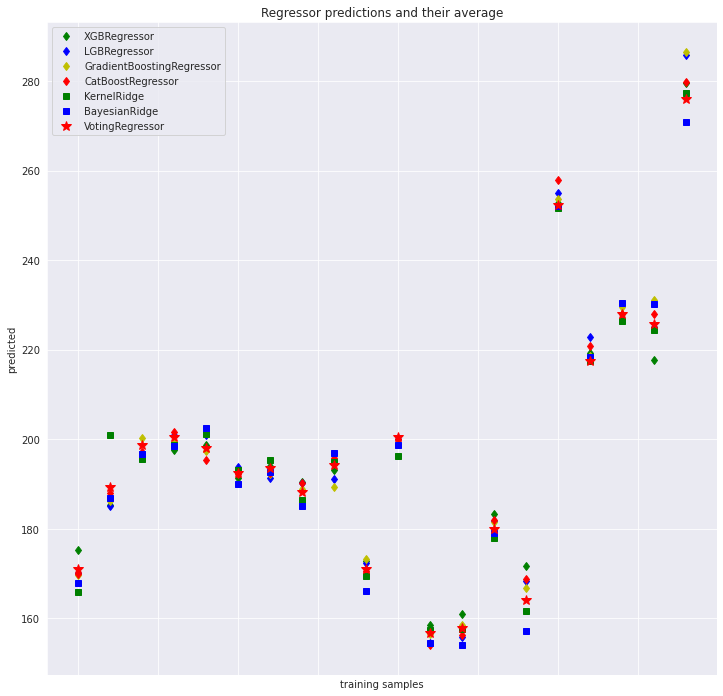

In [121]:
if (use_voting_regressor == 1):
    model_xgb.fit(train, y_train)
    model_lgb.fit(train, y_train)
    GBoost.fit(train, y_train)
    CBoost.fit(train, y_train)
    KRR.fit(train, y_train)
    BR.fit(train, y_train)
    averaged_models_temp = VotingRegressor(estimators=estimator_list, weights=weight_list) 
    averaged_models_temp.fit(train, y_train)

    xt = test[:20]

    pred1 = model_xgb.predict(xt)
    pred2 = model_lgb.predict(xt)
    pred3 = GBoost.predict(xt)
    pred4 = CBoost.predict(xt)
    pred5 = KRR.predict(xt)
    pred6 = BR.predict(xt)
    pred7 = averaged_models_temp.predict(xt)
    plt.figure(figsize=(12,12))
    plt.plot(pred1, 'gd', label='XGBRegressor')
    plt.plot(pred2, 'bd', label='LGBRegressor')
    plt.plot(pred3, 'yd', label='GradientBoostingRegressor')
    plt.plot(pred4, 'rd', label='CatBoostRegressor')
    plt.plot(pred5, 'gs', label='KernelRidge')
    plt.plot(pred6, 'bs', label='BayesianRidge')
    plt.plot(pred7, 'r*', ms=10, label='VotingRegressor')

    plt.tick_params(axis='x', which='both', bottom=False, top=False,
                    labelbottom=False)
    plt.ylabel('predicted')
    plt.xlabel('training samples')
    plt.legend(loc="best")
    plt.title('Regressor predictions and their average')

    plt.show()


<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📒 Stacking</b></div>

# 📒 9. Stacking

In [122]:
# Variant B
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10, shuffle=True): # increasing the n_folds value should give a more accurate prediction, averaged over n_fold iterations
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        self.shuffle = shuffle

    # Fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156) # was 156
        print("shuffle=" + str(self.shuffle))
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models): # for each model passed in
            with MyTimer():
                model_name = model.__class__.__name__
                model_details = str(model)
                print('model_name:', model_name)
                print('model_details:', model_details)
                for train_index, holdout_index in kfold.split(X, y): # create train,holdout splits for the number of folds
                    instance = clone(model)
                    self.base_models_[i].append(instance)
                    #if ("KerasRegressor" in model_name):
                    if ("KerasRegressor" in model_name):
                        hist = instance.fit(X[train_index], y[train_index], shuffle=self.shuffle, validation_split=0.3, callbacks=callbacks_list) # fit the model for this fold
                    elif ("keras" in model_details):
                        instance.fit(X[train_index], y[train_index], dnn__shuffle=True, dnn__validation_split=0.3, dnn__callbacks=callbacks_list)
                    else:
                        instance.fit(X[train_index], y[train_index]) # fit the model for this fold
                    y_pred = instance.predict(X[holdout_index]) # predict values for this fold
                    out_of_fold_predictions[holdout_index, i] = y_pred # add predictions for this model and fold (random rows)
                    #print('out_of_fold_predictions', out_of_fold_predictions)
        # Now train the cloned  meta-model using the out-of-fold predictions as new and only feature
        print("out_of_fold_predictions", out_of_fold_predictions)
        
        meta_model_name = self.meta_model_.__class__.__name__
        print("meta_model_name:", meta_model_name)
        if ("KerasRegressor" in meta_model_name):
            self.meta_model_.fit(out_of_fold_predictions, y, shuffle=self.shuffle, validation_split=0.3, callbacks=callbacks_list) # need to see out_of_fold_predictions feature set
        elif ("keras" in str(self.meta_model_)):
            self.meta_model_.fit(out_of_fold_predictions, y, dnn__shuffle=True, dnn__validation_split=0.3, dnn__callbacks=callbacks_list) # need to see out_of_fold_predictions feature set
        else:
            self.meta_model_.fit(out_of_fold_predictions, y) # need to see out_of_fold_predictions feature set

        #self.meta_model_.fit(out_of_fold_predictions, y) # need to see out_of_fold_predictions feature set
        return self 
    
    # Calculate the predictions of all base models on the test data and use the averaged predictions as 
    # meta-features for the final prediction which is calculated by the meta-model
    
    # add MinMax
    def predict(self, X):
        # column_stack() function is used to stack 1-D arrays as columns into a 2-D array.
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [123]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, KRR, GBoost, model_xgb, lr_poly),#, dnn),
                                                 meta_model = R_new, shuffle=True) 

if (compare_models == 1):
    with MyTimer():
        if (competition == 'SR'):
            score = mae_cv(stacked_averaged_models)
            print("Stacking Averaged models score mean and std: {:.4f} ({:.4f})".format(score.mean(), score.std()))
        else:
            score = rmsle_cv(stacked_averaged_models)
            print("Stacking Averaged models score mean and std: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [124]:
use_Regressor = 0
if (use_Regressor == 1):
    from sklearn.ensemble import StackingRegressor
    from sklearn.linear_model import RidgeCV, LassoCV
    from sklearn.linear_model import ElasticNetCV

    use_cv = 1
    k = {'alpha': 2.2, 'coef0': 0.5, 'degree': 5, 'gamma': 0.001, 'kernel': 'polynomial'}
    if (use_cv == 1):
        e = {'fit_intercept': True, 'l1_ratio': 0.85, 'max_iter': 100, 'normalize': False, 'selection': 'random', 'cv': 10} # 'alpha': 0.05,
        r = {'fit_intercept': True, 'normalize': False, 'cv': None, 'gcv_mode': 'auto'} # cv value has no effect
        estimators = [('enet', make_pipeline(StandardScaler(), ElasticNetCV(**e, random_state=3))),
                      ('gboost', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10,  loss='huber', random_state=5)),
                      ('krr', KernelRidge(**k)),
                      ('br', BayesianRidge())]
        reg = StackingRegressor(
            estimators=estimators,
            final_estimator=RidgeCV(**r))
    else:
        e = {'alpha': 0.05, 'fit_intercept': True, 'l1_ratio': 0.85, 'max_iter': 100, 'normalize': False, 'selection': 'random', 'tol': 0.05}
        r = {'alpha': 8, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'solver': 'auto', 'tol': 0.05, 'cv': None, 'gcv_mode': 'auto', 'random_state': 99} #  
        estimators = [('enet', make_pipeline(StandardScaler(), ElasticNet(**e, random_state=3))),
                      ('gboost', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10,  loss='huber', random_state=5)),
                      ('krr', KernelRidge(**k)),
                      ('br', BayesianRidge())]
        reg = StackingRegressor(
            estimators=estimators,
            final_estimator=Ridge(**r))

    reg.fit(train, y_train)
    stacked_pred = inv_boxcox1p(reg.predict(test), lam_l)
    #reg.transform(inv_boxcox1p(stacked_averaged_models_temp, lam_l))
    print(stacked_pred)
    print(reg)

In [125]:
if (use_Regressor == 2):
    from mlxtend.regressor import StackingCVRegressor
    from sklearn.linear_model import RidgeCV, LassoCV
    from sklearn.linear_model import ElasticNetCV

    use_cv = 0
    k = {'alpha': 2.2, 'coef0': 0.5, 'degree': 5, 'gamma': 0.001, 'kernel': 'polynomial'}
    if (use_cv == 1):
        e = {'fit_intercept': True, 'l1_ratio': 0.85, 'max_iter': 100, 'normalize': False, 'selection': 'random', 'cv': 10} # 'alpha': 0.05,
        r = {'fit_intercept': True, 'normalize': False, 'cv': None, 'gcv_mode': 'auto'} # cv value has no effect
        enet = make_pipeline(StandardScaler(), ElasticNetCV(**e, random_state=3))
        gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10,  loss='huber', random_state=5)
        krr = KernelRidge(**k)
        br = BayesianRidge()
        r = RidgeCV(**r)
        reg = StackingCVRegressor(
            regressors=(enet, gboost, krr, br),
            meta_regressor=r)
    else:
        e = {'alpha': 0.05, 'fit_intercept': True, 'l1_ratio': 0.85, 'max_iter': 100, 'normalize': False, 'selection': 'random'}
        r = {'alpha': 8, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'solver': 'auto', 'tol': 0.001, 'random_state': 99} #  
        enet = make_pipeline(StandardScaler(), ElasticNet(**e, random_state=3))
        gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10,  loss='huber', random_state=5)
        krr = KernelRidge(**k)
        br = BayesianRidge()
        r = Ridge(**r)
        reg = StackingCVRegressor(
            regressors=(enet, gboost, krr, br),
            meta_regressor=r)

    reg.fit(train, y_train)
    stacked_pred = inv_boxcox1p(reg.predict(test), lam_l)
    print(stacked_pred)
    print(reg)
    
    print('5-fold cross validation scores:\n')
    for clf, label in zip([enet, gboost, krr, br], ['enet', 'gboost', 
                                                'krr', 'br',
                                                'StackingCVRegressor']):
        scores = cross_val_score(clf, train, y_train, cv=5, scoring='neg_mean_squared_error')
        print("Neg. MSE Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
        
        #scores = cross_val_score(clf, train, y_train, cv=5)
        #print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📘 Ensembling</b></div>

# 📘 9. Ensembling

## Process Stacked Regressor

[12:50:41] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


2.8240809694821114


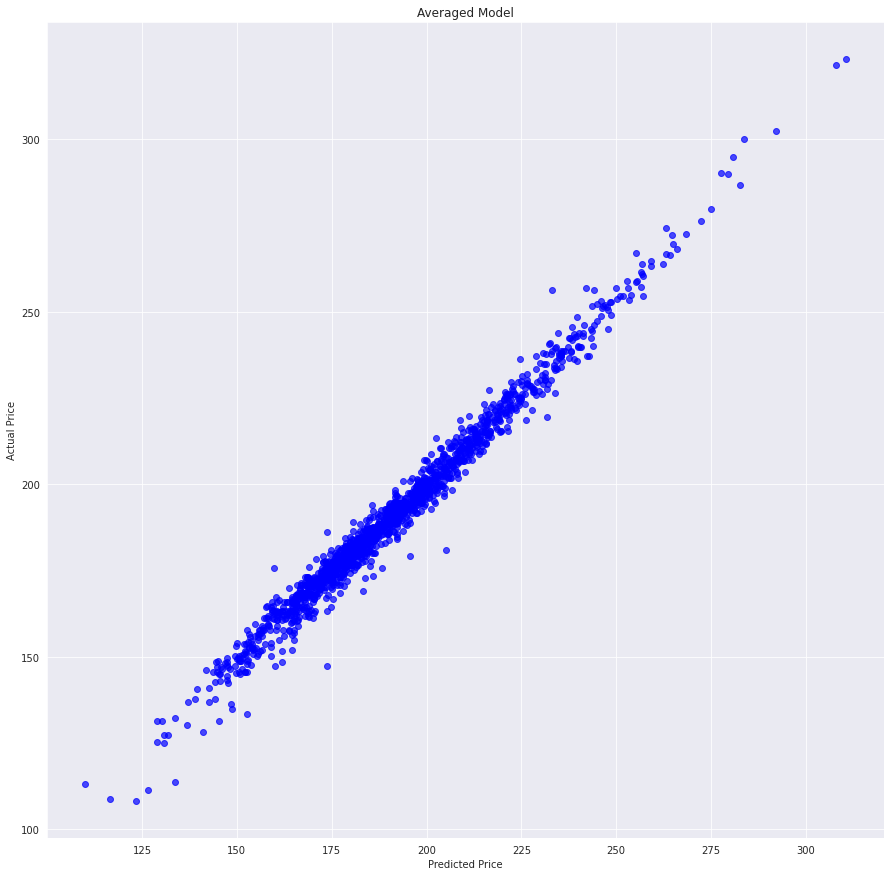

In [126]:
averaged_models.fit(train, y_train)
averaged_train_pred = averaged_models.predict(train)
if (use_voting_regressor == 0):
    averaged_pred = inv_boxcox1p(averaged_models.predict(test), lam_l)

if (competition == 'SR'):
    print(mae(y_train, averaged_train_pred))
else:
    print(rmsle(y_train, averaged_train_pred))
    
plt.figure(figsize=(15,15))
plt.scatter(averaged_train_pred, y_train, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Averaged Model')
plt.show()

In [127]:
if (method == "stacked"):
    with MyTimer():
        stacked_averaged_models.fit(train.values, y_train)
    with MyTimer():
        stacked_train_pred = stacked_averaged_models.predict(train.values)
    if (use_Regressor == 0):
        stacked_pred = inv_boxcox1p(stacked_averaged_models.predict(test.values), lam_l)

shuffle=True
model_name: ElasticNet
model_details: ElasticNet()
The function took 0.21347713470458984 seconds to complete
model_name: KernelRidge
model_details: KernelRidge(alpha=2.2, coef0=0.5, degree=5, gamma=0.001, kernel='polynomial')
The function took 2.070997714996338 seconds to complete
model_name: GradientBoostingRegressor
model_details: GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)
The function took 146.62881636619568 seconds to complete
model_name: XGBRegressor
model_details: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4603,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0468, gpu_id=-1, grow_policy='depthwise',
             im

In [128]:
def fit_pred(train, y_train, test, model):
    #model.fit(train, y_train)
    
    model_name = model.__class__.__name__
    print('model_name:', model_name)
    if ("XGBRegressor" in model_name):
        model.fit(train, y_train) # fit the model for this fold
    elif ("KerasRegressor" in model_name):
        model.fit(train, y_train, shuffle=False, validation_split=0.3, callbacks=callbacks_list) # fit the model for this fold
    elif ("keras" in str(model)):
        model.fit(train, y_train, dnn__shuffle=True, dnn__validation_split=0.3, dnn__callbacks=callbacks_list) # fit the model for this fold
    else:
        print("train", train)
        print("y_train", y_train)
        model.fit(train, y_train) # fit the model for this fold

    model_train_pred = model.predict(train)
    model_pred = inv_boxcox1p(model.predict(test), lam_l)
    return(model_train_pred, model_pred)
    
models      = [ CBoost, lasso, lasso_new, ENet, KRR, GBoost, model_xgb, BR ,  AB, KN, B] # model_lgb,
model_names = ['CBoost', 'lasso', 'lasso_new', 'ENet', 'KRR', 'GBoost',  'model_xgb', 'BR',  'AB', 'KN', 'B']
df_train_pred = pd.DataFrame()
df_test_pred = pd.DataFrame()
with MyTimer():
    for i in range(0,len(models)):
        #print("models[i]", models[i])
        #print("model_names[i]:", model_names[i])
        mn = model_names[i]+"_pred"
        train_pred, test_pred = fit_pred(train, y_train, test, models[i])
        df_train_pred[mn] = train_pred
        df_test_pred[mn] = test_pred
        #print(mn, test_pred)    
  

model_name: CatBoostRegressor
train       MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
0          2.886        5.831   19.212   0.730  0.730     1.541      0.000   
1          2.056        6.221   19.712   0.730  0.730     1.541      0.000   
2          2.886        5.915   20.347   0.730  0.730     0.000      0.000   
3          3.011        5.685   19.692   0.730  0.730     0.000      0.000   
4          2.886        6.315   21.325   0.730  0.730     0.000      0.000   
...          ...          ...      ...     ...    ...       ...        ...   
1453       2.886        5.744   18.961   0.730  0.730     1.541      0.000   
1454       2.056        6.338   20.995   0.730  0.730     1.541      0.000   
1455       3.011        5.860   19.476   0.730  0.730     1.541      0.000   
1456       2.056        5.915   19.760   0.730  0.730     1.541      0.000   
1457       2.056        6.099   19.849   0.730  0.730     1.541      0.000   

      OverallQual  OverallC

## Process XGB

In [129]:
replace_xgb = 0 # new optimized model is worse, was overfit
if (replace_xgb == 1):
    model_xgb_new.fit(train, y_train)
    xgb_train_pred = model_xgb_new.predict(train)
    xgb_pred = inv_boxcox1p(model_xgb_new.predict(test), lam_l)
else:
    model_xgb.fit(train, y_train)
    xgb_train_pred = model_xgb.predict(train)
    xgb_pred = inv_boxcox1p(model_xgb.predict(test), lam_l)

if (competition == 'SR'):
    print(mae(y_train, xgb_train_pred))
else:
    print(rmsle(y_train, xgb_train_pred))

[12:57:53] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


1.0524230419471479


## Process LGBM

In [130]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = inv_boxcox1p(model_lgb.predict(test), lam_l)

if (competition == 'SR'):
    print(mae(y_train, lgb_train_pred))
else:
    print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
3.340856915653702


In [131]:
if (tuning_lgb == 1):
    model_lgb_op.fit(train, y_train)
    lgb_train_pred_op = model_lgb_op.predict(train)
    lgb_pred_op = inv_boxcox1p(model_lgb_op.predict(test), lam_l)

    if (competition == 'SR'):
        print(mae(y_train, lgb_train_pred_op))
    else:
        print(rmsle(y_train, lgb_train_pred_op))

In [132]:
# compare values with optimization
print(lgb_train_pred)
if (tuning_lgb == 1):
    print(lgb_train_pred_op)
print(lgb_pred)
if (tuning_lgb == 1):
    print(lgb_pred_op)

[202.08098187 191.43770656 207.15766017 ... 224.07923964 178.25859365
 185.11139168]
[123670.17974992 156372.45900557 186147.84868836 ... 173026.98277194
 116726.5060317  219425.49458292]


In [133]:
with open('CBoost_new.pkl', 'rb') as fid:
    CBoost_new = pickle.load(fid)
    
CBoost_new.fit
cb_pred = inv_boxcox1p(CBoost_new.predict(test), lam_l)
cb_train_pred = inv_boxcox1p(CBoost_new.predict(train), lam_l)
print(cb_pred)

[126925.27514279 158754.86353238 191241.55515941 ... 167192.07220862
 115356.9523892  223525.4126614 ]


In [134]:
ENet.fit(train,y_train)
KRR.fit(train,y_train)
GBoost.fit(train,y_train)
lr_poly.fit(train,y_train)
model_xgb.fit(train,y_train)
enet_pred = inv_boxcox1p(ENet.predict(test), lam_l)
krr_pred = inv_boxcox1p(KRR.predict(test), lam_l)
gboost_pred = inv_boxcox1p(GBoost.predict(test), lam_l)
lr_pred = inv_boxcox1p(lr_poly.predict(test), lam_l)

br_pred = inv_boxcox1p(BR.predict(test), lam_l)
br_train_pred = inv_boxcox1p(BR.predict(train), lam_l)
# all models being used in final model
#print(cb_pred)
#print(xgb_pred)
#print(lgb_pred)
print(br_pred)
print(enet_pred) 
print(krr_pred)
print(gboost_pred)
print(lr_pred) # changes each time
#print(dnn_pred)

[12:58:34] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[118944.95752953 160959.0355976  185536.97749908 ... 174275.49042156
 116404.50122015 220826.04440337]
[133488.30099144 176627.50624913 207516.82967053 ... 182827.82606208
 111695.76752638 245686.61826529]
[115041.06859992 197022.77013601 182943.84105361 ... 161528.48566488
 102519.69252922 222785.82227883]
[122380.5317529  159297.18674045 195738.22135333 ... 153842.43708988
 114355.08606854 214175.37785181]
[116569.76407368 187242.89793867 176014.72538103 ... 167679.74567872
  88155.72518791 227991.65176114]


In [135]:
if (method == 'stacked'):
    testing_ratio = 0
    if (testing_ratio == 1):
        stkr = 1.00
        xgbr = 0.00
        lgbr = 0.00
        cbr  = 0.00
        brr  = 0.00
    else:
        stkr = 0.70
        xgbr = 0.10 # .10
        lgbr = 0.00
        cbr  = 0.20 # .20
        brr  = 0.00 # 0

    '''RMSE on the entire Train data when averaging'''

    print('RMSLE score on train data:')
    print(mae(y_train,stacked_train_pred*stkr+ xgb_train_pred*xgbr + lgb_train_pred*lgbr + cb_train_pred*cbr + br_train_pred*brr ))
    print(rmsle(y_train,stacked_train_pred*stkr + xgb_train_pred*xgbr + lgb_train_pred*lgbr + cb_train_pred*cbr + br_train_pred*brr ))

RMSLE score on train data:
36085.081883093066
39317.70859483198


In [136]:
print(method)
if (method == 'stacked'):
    ensemble = stacked_pred*stkr + xgb_pred*xgbr + lgb_pred*lgbr + cb_pred*cbr + br_pred*brr  # if using averaged_pred, need to add averaged_pred here
else:
    ensemble = averaged_pred

stacked


In [137]:
print(xgb_pred)
print(lgb_pred)
print(cb_pred)
print(br_pred)
print(averaged_pred)
print(ensemble)

[134493.83 157246.17 185822.17 ... 174396.95 110739.89 224593.6 ]
[123670.17974992 156372.45900557 186147.84868836 ... 173026.98277194
 116726.5060317  219425.49458292]
[126925.27514279 158754.86353238 191241.55515941 ... 167192.07220862
 115356.9523892  223525.4126614 ]
[118944.95752953 160959.0355976  185536.97749908 ... 174275.49042156
 116404.50122015 220826.04440337]
[125341.53915382 166605.18942109 191335.75473398 ... 168601.43905964
 112288.08250668 224902.39012944]
[125052.97627706 169856.40275609 188377.48829631 ... 166345.66150084
 110848.79610705 221513.19660282]


In [138]:
if (method == 'stacked'):
    print(y_train,stacked_train_pred * stkr + xgb_train_pred * xgbr + lgb_train_pred * lgbr) # if using averaged_pred, need to add averaged_pred here
    print(y_train,stacked_train_pred)

[204.93054257 195.08561344 210.04487143 ... 223.56899073 178.84819785
 181.2243778 ] [163.88049664 155.84292055 167.26025925 ... 178.55446626 142.03713739
 145.45073223]
[204.93054257 195.08561344 210.04487143 ... 223.56899073 178.84819785
 181.2243778 ] [205.01663978 194.80455162 209.0531044  ... 223.202452   177.3673485
 181.99477195]


In [139]:
sub_train = pd.DataFrame()
sub_train['Id'] = train_ID
if (method == 'stacked'):
    sub_train['SalePrice'] = inv_boxcox1p(stacked_train_pred, lam_l)
else:
    sub_train['SalePrice'] = inv_boxcox1p(averaged_train_pred, lam_l)

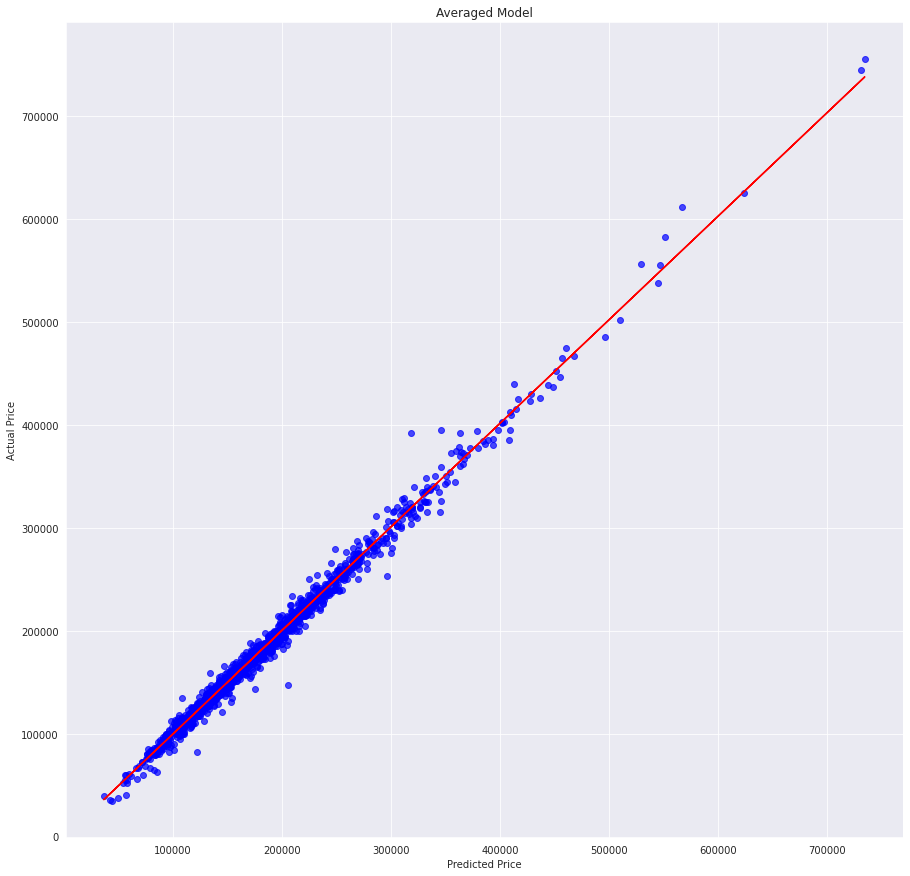

In [140]:
Predicted = sub_train['SalePrice']
Actual = inv_boxcox1p(y_train, lam_l)
plt.figure(figsize=(15,15))
plt.scatter(sub_train['SalePrice'], Actual, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Averaged Model')

m, b = np.polyfit(Predicted, Actual, 1)
#m = slope, b=intercept
plt.plot(Predicted, m*Predicted+b,c='red')
plt.show()

In [141]:
# Pre-adjustment score
print("mae for boxcox(SalePrice)",mae(y_train, sub_train['SalePrice']))
print("mse for boxcox(SalePrice)",rmsle(y_train, sub_train['SalePrice']))
print("mae for SalePrice",mae(Actual, Predicted))
print("mse for SalePrice",rmsle(Actual, Predicted))

mae for boxcox(SalePrice) 180596.1778005207
mse for boxcox(SalePrice) 196948.27111850854
mae for SalePrice 5031.134530471814
mse for SalePrice 7486.045218940292


### Findling best cutoff

In [142]:
def AdjustHigh(sub_train, y_train):
    AdjustedScores = []
    for i in np.arange(.994, 1.000, 0.01):
        for j in np.arange(1.00, 1.10, .01):

            q1 = sub_train['SalePrice'].quantile(0.0025)
            q2 = sub_train['SalePrice'].quantile(0.0045)
            q3 = sub_train['SalePrice'].quantile(i)

            #Verify the cutoffs for the adjustment
            # adjust at low end
            #sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x if x > q1 else x*0.79)
            #sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x if x > q2 else x*0.89)

            # adjust at high end
            sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x if x < q3 else x*j)

            Predicted = sub_train['SalePrice2']
            Actual = inv_boxcox1p(y_train, lam_l)

            # Pre-adjustment score
            #print("mae for boxcox(SalePrice)",mae(y_train, sub_train['SalePrice2']))
            #print("mse for boxcox(SalePrice)",rmsle(y_train, sub_train['SalePrice2']))
            #print("mae for SalePrice",mae(Actual, Predicted))
            #print("mse for SalePrice",rmsle(Actual, Predicted))

            AdjustedScores.append([i, j, mae(y_train, boxcox1p(sub_train['SalePrice2'], lam_l)), rmsle(y_train, boxcox1p(sub_train['SalePrice2'], lam_l)), mae(Actual, Predicted), rmsle(Actual, Predicted)])
    print(q1,q2,q3)
    df_adj = pd.DataFrame(AdjustedScores, columns=["QUANT","COEF","MAE_BC","RMSE_BC","MAE_SP","RMSE_SP"])
    print('quantiles vs coefficients')
    df_adj.sort_values(by=['RMSE_BC'])
    print(df_adj)
    df2 = df_adj.sort_values(by=['RMSE_BC']).reset_index()
    coef_hi = df2.COEF[0]
    quant_hi = df2.QUANT[0]
    return (coef_hi, quant_hi)

ch, qh = AdjustHigh(sub_train, y_train)

52996.87501455675 56789.58388957128 499679.9448520289
quantiles vs coefficients
    QUANT  COEF  MAE_BC  RMSE_BC   MAE_SP  RMSE_SP
0   0.994 1.000   1.967    2.833 5031.135 7486.045
1   0.994 1.010   1.964    2.828 5015.722 7426.881
2   0.994 1.020   1.963    2.826 5005.292 7397.189
3   0.994 1.030   1.964    2.826 5011.074 7397.322
4   0.994 1.040   1.966    2.829 5025.085 7427.281
5   0.994 1.050   1.968    2.833 5039.096 7486.706
6   0.994 1.060   1.972    2.840 5061.206 7574.905
7   0.994 1.070   1.976    2.849 5090.040 7690.887
8   0.994 1.080   1.981    2.860 5119.607 7833.418
9   0.994 1.090   1.988    2.873 5156.217 8001.081
10  0.994 1.100   1.994    2.888 5192.826 8192.331


In [143]:
print('ch',ch)
print('qh',qh)

ch 1.02
qh 0.994


In [144]:
q1 = sub_train['SalePrice'].quantile(0.0015)
q2 = sub_train['SalePrice'].quantile(0.01)
q3 = sub_train['SalePrice'].quantile(qh)

print(q1,q2,q3)

sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x if x < q3 else x*ch)

45615.593788780374 67930.85793190011 499679.9448520289


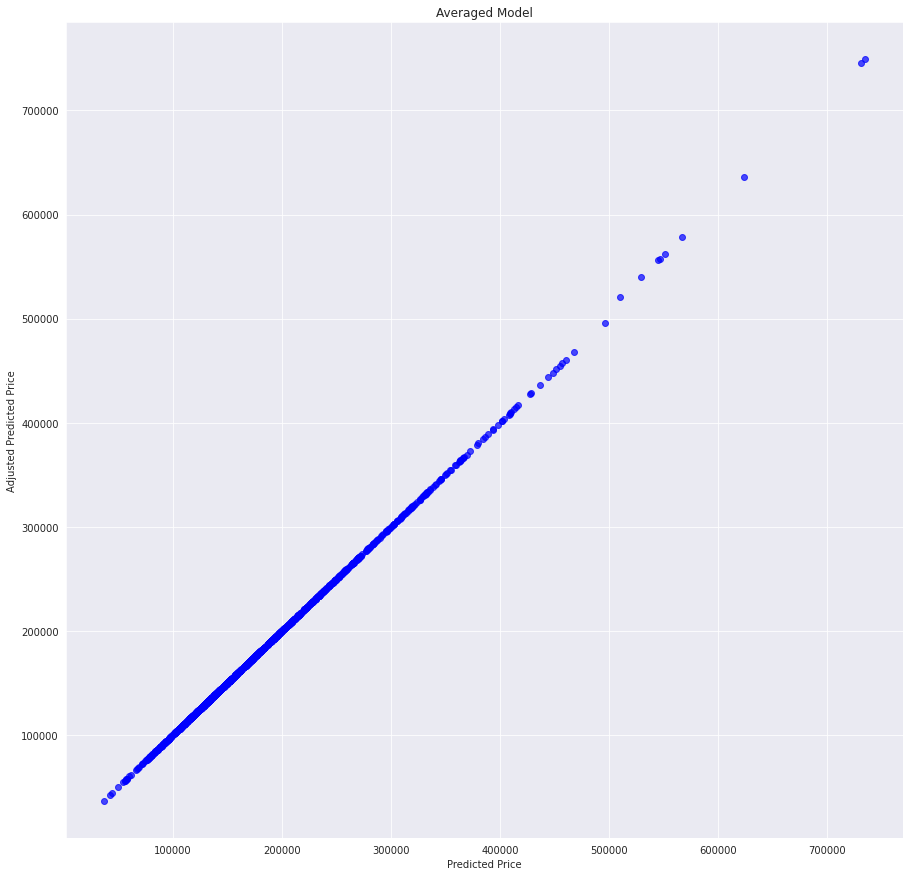

In [145]:
plt.figure(figsize=(15,15))
plt.scatter(sub_train['SalePrice'], sub_train['SalePrice2'], alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Adjusted Predicted Price')
plt.title('Averaged Model')
plt.show()

In [146]:
sub_train.query("SalePrice != SalePrice2")

Id  SalePrice  SalePrice2
178    179 510278.562  520484.133
440    441 546241.687  557166.521
691    692 734314.736  749001.031
769    770 545218.703  556123.077
803    804 551226.158  562250.681
898    899 566844.077  578180.959
1046  1047 529357.339  539944.486
1169  1170 623660.697  636133.911
1182  1183 730516.626  745126.959

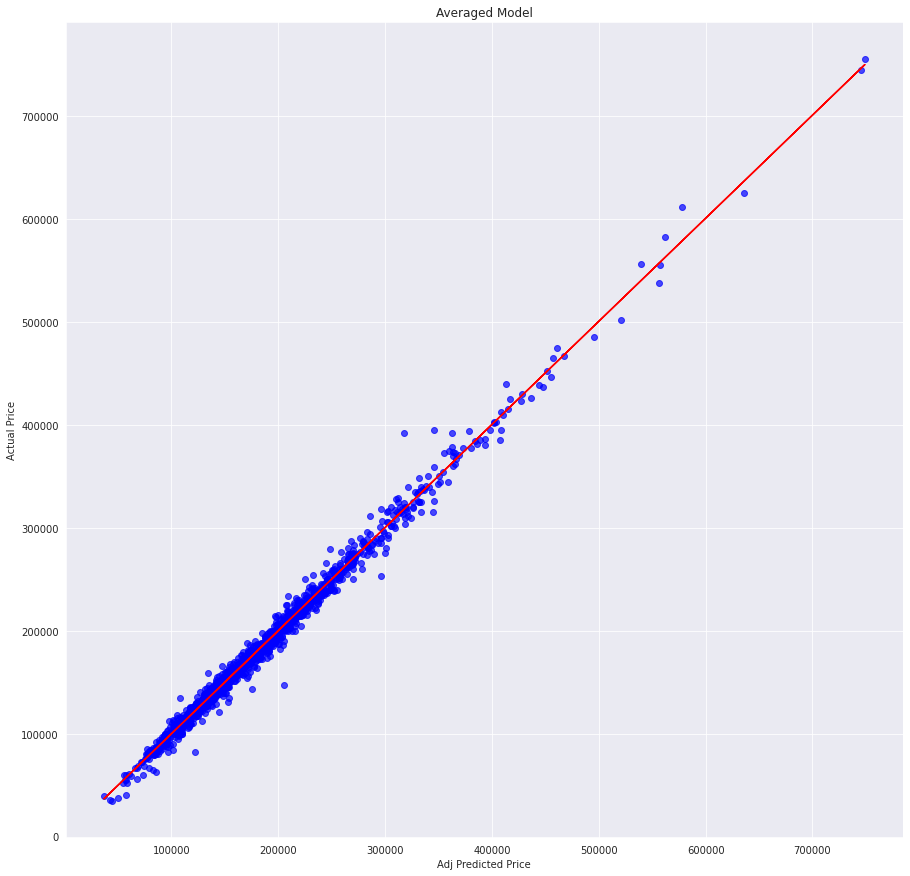

In [147]:
Predicted = sub_train['SalePrice2']
Actual = inv_boxcox1p(y_train, lam_l)
plt.figure(figsize=(15,15))
plt.scatter(sub_train['SalePrice2'], Actual, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Adj Predicted Price')
plt.ylabel('Actual Price')
plt.title('Averaged Model')

m, b = np.polyfit(Predicted, Actual, 1)
#m = slope, b=intercept
plt.plot(Predicted, m*Predicted+b,c='red')
plt.show()

In [148]:
# Post adjustment for high score
print("mae for boxcox(SalePrice2)",mae(y_train, sub_train['SalePrice2']))
print("mse for boxcox(SalePrice2)",rmsle(y_train, sub_train['SalePrice2']))
print("mae for SalePrice2",mae(Actual, Predicted))
print("mse for SalePrice2",rmsle(Actual, Predicted))

mae for boxcox(SalePrice2) 180669.39671115807
mse for boxcox(SalePrice2) 197174.77198036283
mae for SalePrice2 5005.291937519674
mse for SalePrice2 7397.18850111294


### Cutoff at low

In [149]:
def AdjustLow(sub_train, y_train):
    AdjustedScores = []
    for i in np.arange(.00, .02, 0.001):
        for j in np.arange(.90, 1.10, 0.01):

            q1 = sub_train['SalePrice'].quantile(i)
            q2 = sub_train['SalePrice'].quantile(0.1)
            q3 = sub_train['SalePrice'].quantile(.995)

            #Verify the cutoffs for the adjustment
            #print(q1,q2,q3)
            # adjust at low end
            sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x if x > q1 else x*j)
            #sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x if x > q2 else x*0.89)

            # adjust at high end
            #sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x if x < q3 else x*j)

            Predicted = sub_train['SalePrice2']
            Actual = inv_boxcox1p(y_train, lam_l)

            # Pre-adjustment score
            #print("mae for boxcox(SalePrice)",mae(y_train, sub_train['SalePrice2']))
            #print("mse for boxcox(SalePrice)",rmsle(y_train, sub_train['SalePrice2']))
            #print("mae for SalePrice",mae(Actual, Predicted))
            #print("mse for SalePrice",rmsle(Actual, Predicted))

            AdjustedScores.append([i, j, mae(y_train, boxcox1p(sub_train['SalePrice2'], lam_l)), rmsle(y_train, boxcox1p(sub_train['SalePrice2'], lam_l)), mae(Actual, Predicted), rmsle(Actual, Predicted)])
  
    df_adj = pd.DataFrame(AdjustedScores, columns=["QUANT","COEF","MAE_BC","RMSE_BC","MAE_SP","RMSE_SP"])
    print('quantiles vs coefficients')
    df_adj.sort_values(by=['RMSE_BC'])
    print(df_adj)
    df2 = df_adj.sort_values(by=['RMSE_BC']).reset_index()
    coef_lo = df2.COEF[0]
    quant_lo = df2.QUANT[0]
    return (coef_lo, quant_lo)

cl, ql = AdjustLow(sub_train, y_train)

quantiles vs coefficients
     QUANT  COEF  MAE_BC  RMSE_BC   MAE_SP  RMSE_SP
0    0.000 0.900   1.970    2.838 5033.662 7487.496
1    0.000 0.910   1.969    2.837 5033.409 7487.295
2    0.000 0.920   1.969    2.836 5033.156 7487.106
3    0.000 0.930   1.969    2.836 5032.903 7486.930
4    0.000 0.940   1.968    2.835 5032.651 7486.766
..     ...   ...     ...      ...      ...      ...
415  0.019 1.060   1.994    2.898 5067.646 7524.634
416  0.019 1.070   2.001    2.913 5077.784 7534.824
417  0.019 1.080   2.009    2.930 5088.597 7546.079
418  0.019 1.090   2.017    2.948 5099.836 7558.392
419  0.019 1.100   2.025    2.967 5111.180 7571.759

[420 rows x 6 columns]


In [150]:
print('cl',cl)
print('ql',ql)

q1 = sub_train['SalePrice'].quantile(ql)
q2 = sub_train['SalePrice'].quantile(0.1)
q3 = sub_train['SalePrice'].quantile(qh)

print(q1,q2,q3)


sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x*cl if x < q1 else ( x*ch if x > q3 else x))
sub_train.query("SalePrice != SalePrice2")

cl 0.93
ql 0.014
75043.76277888904 106051.9663596561 499679.9448520289


Id  SalePrice  SalePrice2
29      30  69234.147   64387.757
30      31  57227.724   53221.784
178    179 510278.562  520484.133
264    265  71879.497   66847.932
375    376  60324.456   56101.744
398    399  68247.321   63470.009
410    411  73001.309   67891.217
440    441 546241.687  557166.521
495    496  44576.020   41455.699
533    534  36844.961   34265.814
620    621  66281.381   61641.684
636    637  55784.723   51879.792
691    692 734314.736  749001.031
705    706  56239.809   52303.022
710    711  58057.049   53993.056
769    770 545218.703  556123.077
803    804 551226.158  562250.681
812    813  67511.360   62785.565
898    899 566844.077  578180.959
916    917  42127.230   39178.324
968    969  50180.190   46667.576
1046  1047 529357.339  539944.486
1100  1101  57483.775   53459.911
1169  1170 623660.697  636133.911
1182  1183 730516.626  745126.959
1279  1280  74631.846   69407.616
1321  1322  72199.447   67145.486
1325  1326  57976.145   53917.815
1337  1338  54564.136   50744.646
1380  1381  61980.638   57641.993

In [151]:
sub_train['SalePrice2'] = sub_train['SalePrice'].apply(lambda x: x*cl if x < q1 else ( x*ch if x > q3 else x))

sub_train.query("SalePrice != SalePrice2")

Id  SalePrice  SalePrice2
29      30  69234.147   64387.757
30      31  57227.724   53221.784
178    179 510278.562  520484.133
264    265  71879.497   66847.932
375    376  60324.456   56101.744
398    399  68247.321   63470.009
410    411  73001.309   67891.217
440    441 546241.687  557166.521
495    496  44576.020   41455.699
533    534  36844.961   34265.814
620    621  66281.381   61641.684
636    637  55784.723   51879.792
691    692 734314.736  749001.031
705    706  56239.809   52303.022
710    711  58057.049   53993.056
769    770 545218.703  556123.077
803    804 551226.158  562250.681
812    813  67511.360   62785.565
898    899 566844.077  578180.959
916    917  42127.230   39178.324
968    969  50180.190   46667.576
1046  1047 529357.339  539944.486
1100  1101  57483.775   53459.911
1169  1170 623660.697  636133.911
1182  1183 730516.626  745126.959
1279  1280  74631.846   69407.616
1321  1322  72199.447   67145.486
1325  1326  57976.145   53917.815
1337  1338  54564.136   50744.646
1380  1381  61980.638   57641.993

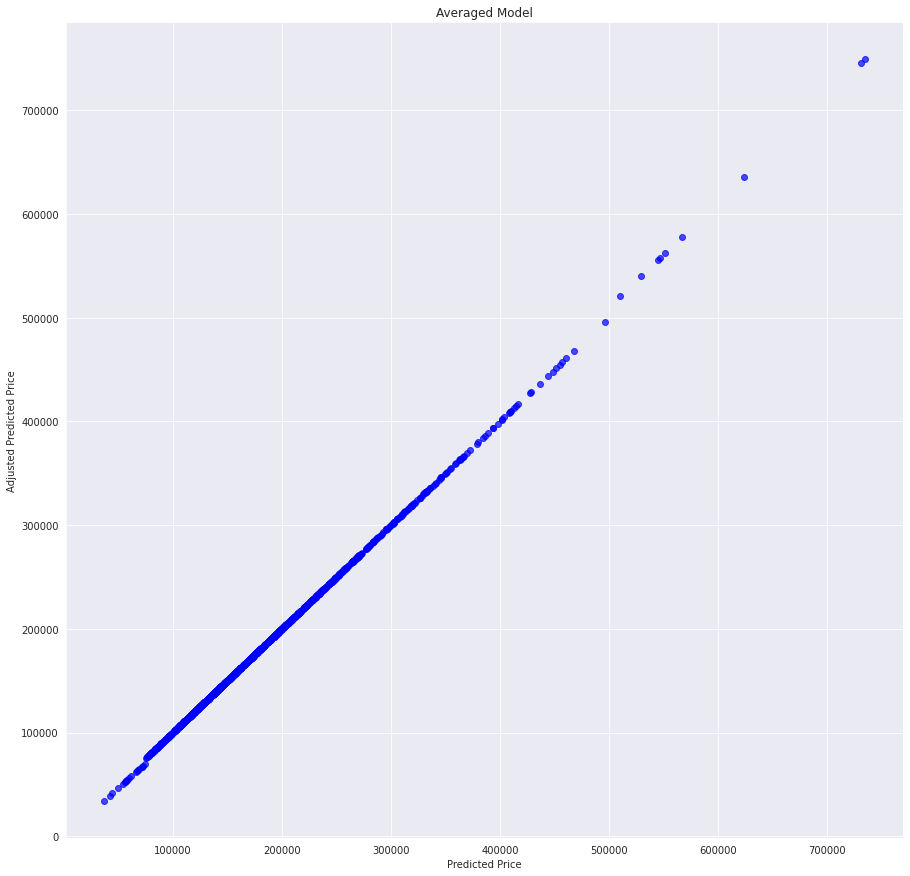

In [152]:
plt.figure(figsize=(15,15))
plt.scatter(sub_train['SalePrice'], sub_train['SalePrice2'], alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Adjusted Predicted Price')
plt.title('Averaged Model')
plt.show()

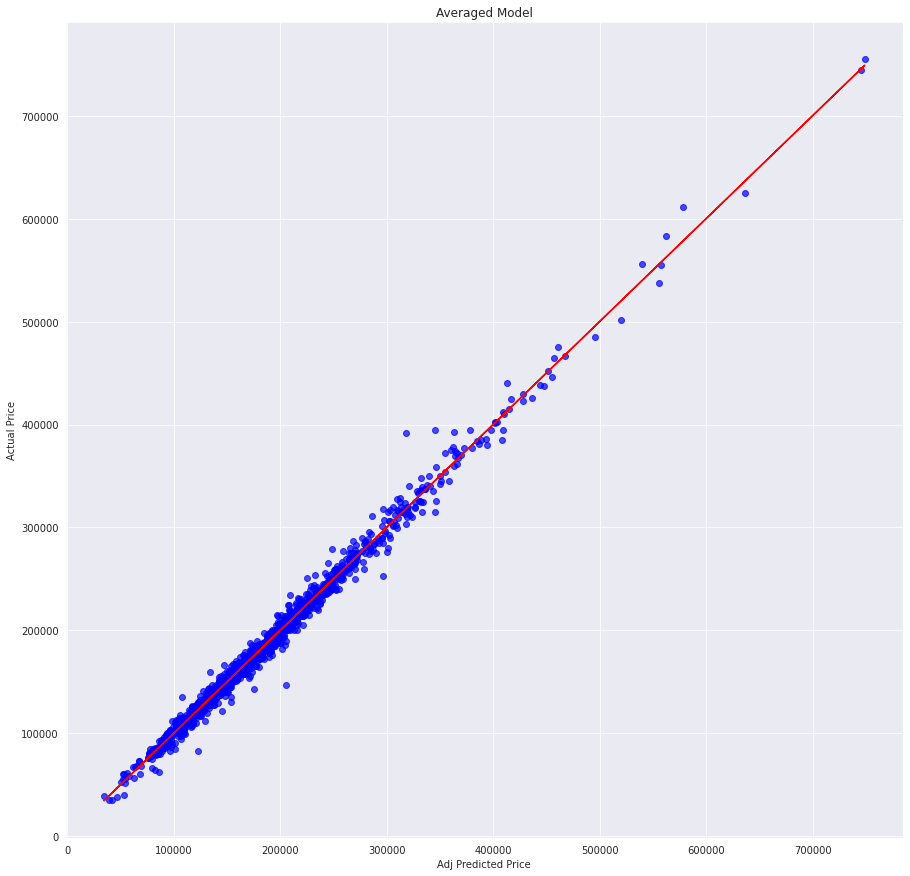

In [153]:
Predicted = sub_train['SalePrice2']
Actual = inv_boxcox1p(y_train, lam_l)
plt.figure(figsize=(15,15))
plt.scatter(sub_train['SalePrice2'], Actual, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Adj Predicted Price')
plt.ylabel('Actual Price')
plt.title('Averaged Model')

m, b = np.polyfit(Predicted, Actual, 1)
#m = slope, b=intercept
plt.plot(Predicted, m*Predicted+b,c='red')

plt.show()

In [154]:
sub_train.query("SalePrice != SalePrice2")

Id  SalePrice  SalePrice2
29      30  69234.147   64387.757
30      31  57227.724   53221.784
178    179 510278.562  520484.133
264    265  71879.497   66847.932
375    376  60324.456   56101.744
398    399  68247.321   63470.009
410    411  73001.309   67891.217
440    441 546241.687  557166.521
495    496  44576.020   41455.699
533    534  36844.961   34265.814
620    621  66281.381   61641.684
636    637  55784.723   51879.792
691    692 734314.736  749001.031
705    706  56239.809   52303.022
710    711  58057.049   53993.056
769    770 545218.703  556123.077
803    804 551226.158  562250.681
812    813  67511.360   62785.565
898    899 566844.077  578180.959
916    917  42127.230   39178.324
968    969  50180.190   46667.576
1046  1047 529357.339  539944.486
1100  1101  57483.775   53459.911
1169  1170 623660.697  636133.911
1182  1183 730516.626  745126.959
1279  1280  74631.846   69407.616
1321  1322  72199.447   67145.486
1325  1326  57976.145   53917.815
1337  1338  54564.136   50744.646
1380  1381  61980.638   57641.993

In [155]:
# Post adjustment for low and high score
print("mae for boxcox(SalePrice2)",mae(y_train, sub_train['SalePrice2']))
print("mse for boxcox(SalePrice2)",rmsle(y_train, sub_train['SalePrice2']))
print("mae for SalePrice2",mae(Actual, Predicted))
print("mse for SalePrice2",rmsle(Actual, Predicted))

mae for boxcox(SalePrice2) 180609.07797217066
mse for boxcox(SalePrice2) 197156.6327141193
mae for SalePrice2 5004.631133750615
mse for SalePrice2 7382.881922668107


<div style="padding:10px;padding-left: 50px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#e9f2c7;overflow:hidden;font-weight:500"><b>📁 Submission</b></div>

# 📁 10. Submission 

In [156]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble

adjust_both = 0
adjust_low = 0
adjust_high = 1

q1 = sub['SalePrice'].quantile(ql)
q2 = sub['SalePrice'].quantile(0.1)
q3 = sub['SalePrice'].quantile(qh)

if (adjust_both == 1):
    sub['SalePrice'] = sub['SalePrice'].apply(lambda x: x*cl if (x < q1) else ( x*ch if (x > q3) else x))
elif (adjust_low == 1):
    sub['SalePrice'] = sub['SalePrice'].apply(lambda x: x if (x > q1) else x*cl) 
elif (adjust_high == 1):
    sub['SalePrice'] = sub['SalePrice'].apply(lambda x: x if (x < q3) else x*ch)
else:
    print("no adjustments made")
    
sub.to_csv('submission.csv',index=False)

<div style="padding:60px;color:black;margin:0;font-size:450%;text-align:center;display:fill;border-radius:5px;background-color:#fac70f;overflow:hidden;font-weight:800"><b>Upvote, Comment</br>Fork, Share</b></div>

## 